In [1]:
!pip install beautifulsoup4 requests nltk pandas openpyxl

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
input_url = "https://docs.google.com/spreadsheets/d/1D7QkDHxUSKnQhR--q0BAwKMxQlUyoJTQ/export?format=xlsx"
input_path = "/content/Input.xlsx"

r = requests.get(input_url)
with open(input_path, "wb") as f:
    f.write(r.content)

df_input = pd.read_excel(input_path)
df_input

,URL_ID,URL
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...
4,Netclan20241021,https://insights.blackcoffer.com/development-o...
...,...,...
142,Netclan20241159,https://insights.blackcoffer.com/population-an...
143,Netclan20241160,https://insights.blackcoffer.com/google-lsa-ap...
144,Netclan20241161,https://insights.blackcoffer.com/healthcare-da...
145,Netclan20241162,https://insights.blackcoffer.com/budget-sales-...


In [3]:
def load_words_from_files(file_list):
    words = set()
    for file in file_list:
        with open(file, "r", encoding="latin-1") as f:
            words.update(word.strip().lower() for word in f)
    return words

In [ ]:
!pip install gdown

In [ ]:
import gdown

# Folder 1
folder1_id = "1rd7YdoX8tED9mujc0c-6evJU4y7LFc_R"
gdown.download_folder(id=folder1_id, output="StopWords", quiet=False)

# Folder 2
folder2_id = "1YRcVlJO3ZaC78iTC6JcunfZl7Fz4AL8v"
gdown.download_folder(id=folder2_id, output="MasterDictionary", quiet=False)


Retrieving folder contents


Processing file 1aWxyJI0d9MOk59OZ_unfBY5E-Nvg_ezW StopWords_Auditor.txt
Processing file 1K-6MjPq5AQg4ICYY6PDfapB7JECUnryD StopWords_Currencies.txt
Processing file 13LXnH6vaJhvY4s2ai_2oW2qwongU_iAI StopWords_DatesandNumbers.txt
Processing file 1tTDfLXNPxNuUGZXHQkQhW6wPf4Xnivwr StopWords_Generic.txt
Processing file 1PnZhcsfjBVxnzwa4N6MrLWf6Kuhhjpdk StopWords_GenericLong.txt
Processing file 1RKxMOHzBdLrGuYb7MCJRTKKPwDG9Agbe StopWords_Geographic.txt
Processing file 1mBOuggD8AVNFjr9sprLoD2_6mVWAgRGE StopWords_Names.txt


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1aWxyJI0d9MOk59OZ_unfBY5E-Nvg_ezW
To: /content/StopWords/StopWords_Auditor.txt
100%|██████████| 88.0/88.0 [00:00<00:00, 266kB/s]
Downloading...
From: https://drive.google.com/uc?id=1K-6MjPq5AQg4ICYY6PDfapB7JECUnryD
To: /content/StopWords/StopWords_Currencies.txt
100%|██████████| 1.76k/1.76k [00:00<00:00, 3.98MB/s]
Downloading...
From: https://drive.google.com/uc?id=13LXnH6vaJhvY4s2ai_2oW2qwongU_iAI
To: /content/StopWords/StopWords_DatesandNumbers.txt
100%|██████████| 832/832 [00:00<00:00, 2.28MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tTDfLXNPxNuUGZXHQkQhW6wPf4Xnivwr
To: /content/StopWords/StopWords_Generic.txt
100%|██████████| 722/722 [00:00<00:00, 2.67MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PnZhcsfjBVxnzwa4N6MrLWf6Kuhhjpdk
To: /content/StopWords/StopWords_GenericLong.txt
100%|██████████| 4.16k/4

Processing file 1qqMwc_-ayS38HEOB97osO_nkIxRkbnvh negative-words.txt
Processing file 1seAj8G42SmfgUUx8lqVDJofm4Tuh2TOT positive-words.txt


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1qqMwc_-ayS38HEOB97osO_nkIxRkbnvh
To: /content/MasterDictionary/negative-words.txt
100%|██████████| 44.8k/44.8k [00:00<00:00, 1.58MB/s]
Downloading...
From: https://drive.google.com/uc?id=1seAj8G42SmfgUUx8lqVDJofm4Tuh2TOT
To: /content/MasterDictionary/positive-words.txt
100%|██████████| 19.1k/19.1k [00:00<00:00, 37.6MB/s]
Download completed


['MasterDictionary/negative-words.txt', 'MasterDictionary/positive-words.txt']

In [ ]:
stopword_files = [
    '/content/StopWords/StopWords_Auditor.txt',
    '/content/StopWords/StopWords_Currencies.txt',
    '/content/StopWords/StopWords_DatesandNumbers.txt',
    '/content/StopWords/StopWords_Generic.txt',
    '/content/StopWords/StopWords_GenericLong.txt',
    '/content/StopWords/StopWords_Geographic.txt',
    '/content/StopWords/StopWords_Names.txt'
]

stop_words = load_words_from_files(stopword_files)

In [ ]:
positive_words = load_words_from_files(['/content/MasterDictionary/positive-words.txt'])
negative_words = load_words_from_files(['/content/MasterDictionary/negative-words.txt'])

In [ ]:
def extract_article_text(url):
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.content, 'html.parser')

        article = soup.find('article')
        if article:
            return article.get_text(separator=' ')
        else:
            return soup.get_text()
    except:
        return ""

In [ ]:
def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

In [ ]:
def count_syllables(word):
    vowels = "aeiou"
    word = word.lower()
    count = 0

    if word[0] in vowels:
        count += 1

    for i in range(1, len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1

    if word.endswith(("es", "ed")):
        count -= 1

    return max(count, 1)

In [ ]:
def analyze_text(text):
    sentences = sent_tokenize(text)
    tokens = clean_text(text)

    word_count = len(tokens)
    sentence_count = len(sentences)

    positive_score = sum(1 for w in tokens if w in positive_words)
    negative_score = sum(1 for w in tokens if w in negative_words)

    polarity_score = (positive_score - negative_score) / ((positive_score + negative_score) + 0.000001)
    subjectivity_score = (positive_score + negative_score) / (word_count + 0.000001)

    complex_words = [w for w in tokens if count_syllables(w) > 2]
    complex_word_count = len(complex_words)

    avg_sentence_length = word_count / sentence_count if sentence_count else 0
    percentage_complex_words = complex_word_count / word_count if word_count else 0
    fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)

    syllables_per_word = sum(count_syllables(w) for w in tokens) / word_count if word_count else 0
    avg_word_length = sum(len(w) for w in tokens) / word_count if word_count else 0

    pronouns = len(re.findall(r'\b(I|we|my|ours|us)\b', text, re.I))

    return [
        positive_score, negative_score, polarity_score, subjectivity_score,
        avg_sentence_length, percentage_complex_words, fog_index,
        avg_sentence_length, complex_word_count, word_count,
        syllables_per_word, pronouns, avg_word_length
    ]

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
output_data = []

for _, row in df_input.iterrows():
    text = extract_article_text(row['URL'])
    metrics = analyze_text(text)

    output_data.append([row['URL_ID'], row['URL']] + metrics)

In [ ]:
columns = [
    "URL_ID","URL","POSITIVE SCORE","NEGATIVE SCORE","POLARITY SCORE",
    "SUBJECTIVITY SCORE","AVG SENTENCE LENGTH","PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX","AVG NUMBER OF WORDS PER SENTENCE","COMPLEX WORD COUNT",
    "WORD COUNT","SYLLABLE PER WORD","PERSONAL PRONOUNS","AVG WORD LENGTH"
]

df_output = pd.DataFrame(output_data, columns=columns)

output_path = "/content/Output.xlsx"
df_output.to_excel(output_path, index=False)

df_output


,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,9,3,0.500000,0.055046,36.333333,0.348624,14.672783,36.333333,76,218,2.215596,3,7.211009
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,13,10,0.130435,0.051570,12.388889,0.320628,5.083807,12.388889,143,446,2.188341,7,6.905830
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,16,7,0.391304,0.065527,29.250000,0.267806,11.807123,29.250000,94,351,2.074074,1,6.569801
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,27,14,0.317073,0.086498,17.555556,0.491561,7.218847,17.555556,233,474,2.487342,4,7.725738
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,9,2,0.636364,0.022774,11.232558,0.347826,4.632154,11.232558,168,483,2.341615,3,6.973085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Netclan20241159,https://insights.blackcoffer.com/population-an...,15,12,0.111111,0.047619,16.200000,0.372134,6.628854,16.200000,211,567,2.306878,3,6.989418
143,Netclan20241160,https://insights.blackcoffer.com/google-lsa-ap...,22,19,0.073171,0.049939,12.439394,0.293544,5.093175,12.439394,241,821,2.203410,7,6.752741
144,Netclan20241161,https://insights.blackcoffer.com/healthcare-da...,10,12,-0.090909,0.092050,14.058824,0.280335,5.735663,14.058824,67,239,2.133891,14,6.677824
145,Netclan20241162,https://insights.blackcoffer.com/budget-sales-...,5,2,0.428571,0.050000,140.000000,0.207143,56.082857,140.000000,29,140,2.100000,0,6.528571


In [4]:
!pip install pandas feedparser openpyxl

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.1 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=e685561c06a42151d61abb6d52a8bee6d0bfd03bb3a8a3165c2156449897c2d2
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [9]:
import feedparser
import pandas as pd

# ---------------------------
# Configuration
# ---------------------------
QUERY = "financial markets"
MAX_URLS = 400

# Google News RSS feed
rss_url = f"https://news.google.com/rss/search?q={QUERY.replace(' ', '+')}"

# ---------------------------
# Fetch URLs from web
# ---------------------------
feed = feedparser.parse(rss_url)

urls = []
for entry in feed.entries[:MAX_URLS]:
    urls.append(entry.link)

# ---------------------------
# Auto-generate URL_IDs
# ---------------------------
data = {
    "URL_ID": [f"AUTO_{str(i+1).zfill(3)}" for i in range(len(urls))],
    "URL": urls
}

df_input = pd.DataFrame(data)

# ---------------------------
# Save Input.xlsx
# ---------------------------
input_path = "Input.xlsx"
df_input.to_excel(input_path, index=False)

print("Input.xlsx created automatically from web URLs")
df_input


Input.xlsx created automatically from web URLs


,URL_ID,URL
0,AUTO_001,https://news.google.com/rss/articles/CBMiqgFBV...
1,AUTO_002,https://news.google.com/rss/articles/CBMihwFBV...
2,AUTO_003,https://news.google.com/rss/articles/CBMigwFBV...
3,AUTO_004,https://news.google.com/rss/articles/CBMioAFBV...
4,AUTO_005,https://news.google.com/rss/articles/CBMinwFBV...
...,...,...
95,AUTO_096,https://news.google.com/rss/articles/CBMihgFBV...
96,AUTO_097,https://news.google.com/rss/articles/CBMirwFBV...
97,AUTO_098,https://news.google.com/rss/articles/CBMizwFBV...
98,AUTO_099,https://news.google.com/rss/articles/CBMixwFBV...


In [10]:
!pip install pandas feedparser requests beautifulsoup4 nltk openpyxl

In [11]:
import pandas as pd
import feedparser
import requests
import nltk
import re
import string

from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
QUERY = "artificial intelligence"
MAX_URLS = 200

rss_url = f"https://news.google.com/rss/search?q={QUERY.replace(' ', '+')}"
feed = feedparser.parse(rss_url)

urls = [entry.link for entry in feed.entries[:MAX_URLS]]

df_input = pd.DataFrame({
    "URL_ID": [f"AUTO_{str(i+1).zfill(3)}" for i in range(len(urls))],
    "URL": urls
})

df_input.to_excel("Input.xlsx", index=False)
print("Input.xlsx created")


Input.xlsx created


In [14]:
input_path = "Input.xlsx"
df_input.to_excel(input_path, index=False)

print("Input.xlsx created automatically from web URLs")
df_input

Input.xlsx created automatically from web URLs


,URL_ID,URL
0,AUTO_001,https://news.google.com/rss/articles/CBMilgFBV...
1,AUTO_002,https://news.google.com/rss/articles/CBMirgFBV...
2,AUTO_003,https://news.google.com/rss/articles/CBMivAFBV...
3,AUTO_004,https://news.google.com/rss/articles/CBMiyAFBV...
4,AUTO_005,https://news.google.com/rss/articles/CBMihgFBV...
...,...,...
95,AUTO_096,https://news.google.com/rss/articles/CBMiqwFBV...
96,AUTO_097,https://news.google.com/rss/articles/CBMingFBV...
97,AUTO_098,https://news.google.com/rss/articles/CBMigwFBV...
98,AUTO_099,https://news.google.com/rss/articles/CBMiigFBV...


In [15]:
def extract_article_text(url):
    try:
        r = requests.get(url, timeout=10)
        soup = BeautifulSoup(r.text, "html.parser")

        paragraphs = soup.find_all("p")
        text = " ".join(p.get_text() for p in paragraphs)

        return text
    except:
        return ""


In [16]:
stop_words = set(stopwords.words("english"))

def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    tokens = [
        w for w in tokens
        if w.isalpha() and w not in stop_words
    ]
    return tokens


In [17]:
def count_syllables(word):
    vowels = "aeiou"
    count = 0

    if word[0] in vowels:
        count += 1

    for i in range(1, len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1

    if word.endswith(("es", "ed")):
        count -= 1

    return max(count, 1)


def count_personal_pronouns(text):
    return len(re.findall(r'\b(I|we|my|ours|us)\b', text, re.I))


In [18]:
sia = SentimentIntensityAnalyzer()

def analyze_text(text):
    sentences = sent_tokenize(text)
    tokens = clean_tokens(text)

    word_count = len(tokens)
    sentence_count = len(sentences)

    sentiment = sia.polarity_scores(text)

    positive_score = sentiment['pos']
    negative_score = sentiment['neg']

    polarity_score = sentiment['compound']
    subjectivity_score = positive_score + negative_score

    complex_words = [w for w in tokens if count_syllables(w) > 2]
    complex_word_count = len(complex_words)

    avg_sentence_length = word_count / sentence_count if sentence_count else 0
    percentage_complex_words = complex_word_count / word_count if word_count else 0
    fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)

    syllable_per_word = (
        sum(count_syllables(w) for w in tokens) / word_count
        if word_count else 0
    )

    avg_word_length = (
        sum(len(w) for w in tokens) / word_count
        if word_count else 0
    )

    personal_pronouns = count_personal_pronouns(text)

    return [
        positive_score,
        negative_score,
        polarity_score,
        subjectivity_score,
        avg_sentence_length,
        percentage_complex_words,
        fog_index,
        avg_sentence_length,
        complex_word_count,
        word_count,
        syllable_per_word,
        personal_pronouns,
        avg_word_length
    ]


In [20]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
output_rows = []

for _, row in df_input.iterrows():
    article_text = extract_article_text(row["URL"])
    metrics = analyze_text(article_text)

    output_rows.append([row["URL_ID"], row["URL"]] + metrics)

columns = [
    "URL_ID", "URL",
    "POSITIVE SCORE", "NEGATIVE SCORE",
    "POLARITY SCORE", "SUBJECTIVITY SCORE",
    "AVG SENTENCE LENGTH", "PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX", "AVG NUMBER OF WORDS PER SENTENCE",
    "COMPLEX WORD COUNT", "WORD COUNT",
    "SYLLABLE PER WORD", "PERSONAL PRONOUNS",
    "AVG WORD LENGTH"
]

df_output = pd.DataFrame(output_rows, columns=columns)
df_output.to_excel("Output.xlsx", index=False)

print("Output.xlsx generated successfully")


Output.xlsx generated successfully


In [22]:
from urllib.parse import urlparse
from nltk import pos_tag

In [23]:
def analyze_text_extended(text, url):
    sentences = sent_tokenize(text)
    paragraphs = [p for p in text.split("\n") if len(p.strip()) > 0]
    tokens = clean_tokens(text)

    word_count = len(tokens)
    sentence_count = len(sentences)
    paragraph_count = len(paragraphs)

    # ---- Sentiment ----
    sentiment = sia.polarity_scores(text)

    pos = sentiment['pos']
    neg = sentiment['neg']
    neu = sentiment['neu']
    polarity = sentiment['compound']
    intensity = abs(polarity)
    emotionality = pos + neg

    subjectivity = emotionality / (word_count + 1e-6)

    # ---- Complexity ----
    syllables = sum(count_syllables(w) for w in tokens)
    complex_words = [w for w in tokens if count_syllables(w) > 2]

    complex_count = len(complex_words)
    pct_complex = complex_count / word_count if word_count else 0

    avg_sentence_len = word_count / sentence_count if sentence_count else 0
    fog_index = 0.4 * (avg_sentence_len + pct_complex)

    # ---- Readability ----
    flesch = 206.835 - (1.015 * avg_sentence_len) - (84.6 * (syllables / word_count)) if word_count else 0
    reading_time = word_count / 225

    # ---- Lexical richness ----
    unique_words = len(set(tokens))
    ttr = unique_words / word_count if word_count else 0

    # ---- Style ----
    questions = text.count("?")
    exclamations = text.count("!")
    pronouns = count_personal_pronouns(text)

    avg_word_len = sum(len(w) for w in tokens) / word_count if word_count else 0

    # ---- Metadata ----
    domain = urlparse(url).netloc
    length_category = (
        "Short" if word_count < 500 else
        "Medium" if word_count <= 1200 else
        "Long"
    )

    return [
        domain, pos, neg, neu, polarity, intensity, emotionality,
        subjectivity, word_count, unique_words, ttr,
        sentence_count, avg_sentence_len, paragraph_count,
        complex_count, pct_complex, fog_index,
        flesch, reading_time, pronouns,
        questions, exclamations, avg_word_len, length_category
    ]


In [26]:
extended_columns = [
    "URL_ID", "URL", "DOMAIN",
    "POSITIVE SCORE", "NEGATIVE SCORE", "NEUTRAL SCORE",
    "POLARITY SCORE", "SENTIMENT INTENSITY", "EMOTIONALITY SCORE",
    "SUBJECTIVITY SCORE",
    "WORD COUNT", "UNIQUE WORD COUNT", "TYPE TOKEN RATIO",
    "SENTENCE COUNT", "AVG SENTENCE LENGTH",
    "PARAGRAPH COUNT",
    "COMPLEX WORD COUNT", "PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX",
    "FLESCH READING EASE", "READING TIME (MIN)",
    "PERSONAL PRONOUNS",
    "QUESTION COUNT", "EXCLAMATION COUNT",
    "AVG WORD LENGTH",
    "ARTICLE LENGTH CATEGORY"
]

In [27]:
rows = []

for _, row in df_input.iterrows():
    text = extract_article_text(row["URL"])
    metrics = analyze_text_extended(text, row["URL"])
    rows.append([row["URL_ID"], row["URL"]] + metrics)

df_extended = pd.DataFrame(rows, columns=extended_columns)
df_extended.to_excel("Output_Extended.xlsx", index=False)


In [36]:
input_path = "Output_Extended.xlsx"
df_input.to_excel(input_path, index=False)

print("Input.xlsx created automatically from web URLs")
df_input

Input.xlsx created automatically from web URLs


,URL_ID,URL
0,AUTO_001,https://news.google.com/rss/articles/CBMilgFBV...
1,AUTO_002,https://news.google.com/rss/articles/CBMirgFBV...
2,AUTO_003,https://news.google.com/rss/articles/CBMivAFBV...
3,AUTO_004,https://news.google.com/rss/articles/CBMiyAFBV...
4,AUTO_005,https://news.google.com/rss/articles/CBMihgFBV...
...,...,...
95,AUTO_096,https://news.google.com/rss/articles/CBMirwFBV...
96,AUTO_097,https://news.google.com/rss/articles/CBMiqwFBV...
97,AUTO_098,https://news.google.com/rss/articles/CBMioAJBV...
98,AUTO_099,https://news.google.com/rss/articles/CBMiWkFVX...


In [31]:
# ============================================================
# 1. INSTALL DEPENDENCIES (COLAB ONLY)
# ============================================================
# !pip install pandas feedparser requests beautifulsoup4 nltk openpyxl

# ============================================================
# 2. IMPORTS & NLTK SETUP
# ============================================================
import pandas as pd
import feedparser
import requests
import nltk
import re
from bs4 import BeautifulSoup
from urllib.parse import urlparse

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

# ============================================================
# 3. AUTO-GENERATE INPUT.XLSX FROM WEB
# ============================================================
QUERY = "artificial intelligence"
MAX_URLS = 200

rss_url = f"https://news.google.com/rss/search?q={QUERY.replace(' ', '+')}"
feed = feedparser.parse(rss_url)

urls = [entry.link for entry in feed.entries[:MAX_URLS]]

df_input = pd.DataFrame({
    "URL_ID": [f"AUTO_{str(i+1).zfill(3)}" for i in range(len(urls))],
    "URL": urls
})

df_input.to_excel("Input.xlsx", index=False)

# ============================================================
# 4. SCRAPE ARTICLE TEXT
# ============================================================
def extract_article_text(url):
    try:
        r = requests.get(url, timeout=10)
        soup = BeautifulSoup(r.text, "html.parser")
        paragraphs = soup.find_all("p")
        return " ".join(p.get_text() for p in paragraphs)
    except:
        return ""

# ============================================================
# 5. TEXT CLEANING
# ============================================================
def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words]

# ============================================================
# 6. HELPER FUNCTIONS
# ============================================================
def count_syllables(word):
    vowels = "aeiou"
    count = 0
    if word[0] in vowels:
        count += 1
    for i in range(1, len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1
    if word.endswith(("es", "ed")):
        count -= 1
    return max(count, 1)

def count_pronouns(text):
    return len(re.findall(r'\b(I|we|my|ours|us)\b', text, re.I))

# ============================================================
# 7. ORIGINAL METRICS
# ============================================================
def analyze_original(text):
    sentences = sent_tokenize(text)
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)

    sentiment = sia.polarity_scores(text)

    pos = sentiment['pos']
    neg = sentiment['neg']
    polarity = sentiment['compound']
    subjectivity = pos + neg

    complex_words = [w for w in tokens if count_syllables(w) > 2]
    complex_count = len(complex_words)

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = complex_count / wc if wc else 0
    fog = 0.4 * (avg_sentence_len + pct_complex)

    syll_per_word = sum(count_syllables(w) for w in tokens) / wc if wc else 0
    avg_word_len = sum(len(w) for w in tokens) / wc if wc else 0
    pronouns = count_pronouns(text)

    return [
        pos, neg, polarity, subjectivity,
        avg_sentence_len, pct_complex, fog,
        avg_sentence_len, complex_count, wc,
        syll_per_word, pronouns, avg_word_len
    ]

# ============================================================
# 8. EXTENDED METRICS
# ============================================================
def analyze_extended(text, url):
    sentences = sent_tokenize(text)
    paragraphs = [p for p in text.split("\n") if p.strip()]
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    pc = len(paragraphs)

    sentiment = sia.polarity_scores(text)

    pos = sentiment['pos']
    neg = sentiment['neg']
    neu = sentiment['neu']
    polarity = sentiment['compound']

    intensity = abs(polarity)
    emotionality = pos + neg
    subjectivity = emotionality / (wc + 1e-6)

    unique_words = len(set(tokens))
    ttr = unique_words / wc if wc else 0

    complex_words = [w for w in tokens if count_syllables(w) > 2]
    complex_count = len(complex_words)
    pct_complex = complex_count / wc if wc else 0

    avg_sentence_len = wc / sc if sc else 0
    fog = 0.4 * (avg_sentence_len + pct_complex)

    syllables = sum(count_syllables(w) for w in tokens)
    flesch = 206.835 - (1.015 * avg_sentence_len) - (84.6 * (syllables / wc)) if wc else 0

    reading_time = wc / 225
    avg_word_len = sum(len(w) for w in tokens) / wc if wc else 0

    pronouns = count_pronouns(text)
    questions = text.count("?")
    exclamations = text.count("!")

    domain = urlparse(url).netloc
    length_cat = "Short" if wc < 500 else "Medium" if wc <= 1200 else "Long"

    return [
        domain, pos, neg, neu, polarity, intensity, emotionality,
        subjectivity, wc, unique_words, ttr,
        sc, avg_sentence_len, pc,
        complex_count, pct_complex, fog,
        flesch, reading_time, pronouns,
        questions, exclamations, avg_word_len, length_cat
    ]

# ============================================================
# 9. GENERATE OUTPUT FILES
# ============================================================
original_cols = [
    "URL_ID","URL","POSITIVE SCORE","NEGATIVE SCORE","POLARITY SCORE",
    "SUBJECTIVITY SCORE","AVG SENTENCE LENGTH","PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX","AVG NUMBER OF WORDS PER SENTENCE","COMPLEX WORD COUNT",
    "WORD COUNT","SYLLABLE PER WORD","PERSONAL PRONOUNS","AVG WORD LENGTH"
]

extended_cols = [
    "URL_ID","URL","DOMAIN","POSITIVE SCORE","NEGATIVE SCORE","NEUTRAL SCORE",
    "POLARITY SCORE","SENTIMENT INTENSITY","EMOTIONALITY SCORE",
    "SUBJECTIVITY SCORE","WORD COUNT","UNIQUE WORD COUNT","TYPE TOKEN RATIO",
    "SENTENCE COUNT","AVG SENTENCE LENGTH","PARAGRAPH COUNT",
    "COMPLEX WORD COUNT","PERCENTAGE OF COMPLEX WORDS","FOG INDEX",
    "FLESCH READING EASE","READING TIME (MIN)","PERSONAL PRONOUNS",
    "QUESTION COUNT","EXCLAMATION COUNT","AVG WORD LENGTH",
    "ARTICLE LENGTH CATEGORY"
]

orig_rows, ext_rows = [], []

for _, row in df_input.iterrows():
    text = extract_article_text(row["URL"])
    orig_rows.append([row["URL_ID"], row["URL"]] + analyze_original(text))
    ext_rows.append([row["URL_ID"], row["URL"]] + analyze_extended(text, row["URL"]))

df_output = pd.DataFrame(orig_rows, columns=original_cols)
df_extended = pd.DataFrame(ext_rows, columns=extended_cols)

df_output.to_excel("Output.xlsx", index=False)
df_extended.to_excel("Output_Extended.xlsx", index=False)

# ============================================================
# 10. COMPARISON ANALYSIS (PROOF)
# ============================================================
original_metrics = ["POSITIVE SCORE","NEGATIVE SCORE","POLARITY SCORE","SUBJECTIVITY SCORE","FOG INDEX"]
extended_metrics = ["NEUTRAL SCORE","SENTIMENT INTENSITY","EMOTIONALITY SCORE","TYPE TOKEN RATIO","FLESCH READING EASE"]

comparison = pd.DataFrame({
    "Original Avg Variance": [df_output[original_metrics].var().mean()],
    "Extended Avg Variance": [df_extended[extended_metrics].var().mean()],
    "Original Avg Correlation": [df_output[original_metrics].corr().abs().mean().mean()],
    "Extended Avg Correlation": [df_extended[extended_metrics].corr().abs().mean().mean()]
})

comparison


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Original Avg Variance,Extended Avg Variance,Original Avg Correlation,Extended Avg Correlation
0,0.0,0.0,NaN,NaN


In [37]:
# ============================================================
# 0. INSTALL DEPENDENCIES (Colab only)
# ============================================================
# !pip install pandas feedparser requests beautifulsoup4 nltk openpyxl

# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import feedparser
import requests
import nltk
import re
from bs4 import BeautifulSoup
from urllib.parse import urlparse
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import time

# ============================================================
# 2. NLTK SETUP
# ============================================================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

# ============================================================
# 3. FETCH URLs (at least 100)
# ============================================================
QUERY = "artificial intelligence"
MAX_URLS = 200  # Fetch more to ensure at least 100 valid articles

rss = f"https://news.google.com/rss/search?q={QUERY.replace(' ', '+')}"
feed = feedparser.parse(rss)

urls = []
for entry in feed.entries:
    urls.append(entry.link)
    if len(urls) >= MAX_URLS:
        break

# Remove duplicates
urls = list(dict.fromkeys(urls))

df_input = pd.DataFrame({
    "URL_ID": [f"AUTO_{i+1:03d}" for i in range(len(urls))],
    "URL": urls
})

df_input.to_excel("Input.xlsx", index=False)
print(f"Generated Input.xlsx with {len(urls)} URLs")

# ============================================================
# 4. HELPER FUNCTIONS
# ============================================================

def resolve_url(url):
    """Follow redirects and get final URL"""
    try:
        return requests.get(url, timeout=10, allow_redirects=True).url
    except:
        return url

def extract_article_text(url):
    """Extract text from <p> tags"""
    try:
        url = resolve_url(url)
        headers = {"User-Agent": "Mozilla/5.0"}
        html = requests.get(url, headers=headers, timeout=10).text
        soup = BeautifulSoup(html, "html.parser")
        text = " ".join(p.get_text() for p in soup.find_all("p"))
        return text.strip()
    except:
        return ""

def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words]

def count_syllables(word):
    vowels = "aeiou"
    count = 0
    if word[0] in vowels:
        count += 1
    for i in range(1, len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1
    if word.endswith(("es", "ed")):
        count -= 1
    return max(count, 1)

def count_pronouns(text):
    return len(re.findall(r'\b(I|we|my|ours|us)\b', text, re.I))

def safe_analyze(func, *args):
    """Return zeros if analysis fails"""
    try:
        result = func(*args)
        assert result is not None
        return result
    except:
        if func.__name__ == "analyze_original":
            return [0]*13
        else:
            return [0]*24

# ============================================================
# 5. ORIGINAL METRICS
# ============================================================
def analyze_original(text):
    sentences = sent_tokenize(text)
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)

    s = sia.polarity_scores(text)
    complex_words = [w for w in tokens if count_syllables(w) > 2]

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0

    return [
        s['pos'],                          # POSITIVE SCORE
        s['neg'],                          # NEGATIVE SCORE
        s['compound'],                     # POLARITY SCORE
        s['pos'] + s['neg'],               # SUBJECTIVITY SCORE
        avg_sentence_len,                  # AVG SENTENCE LENGTH
        pct_complex,                       # PERCENTAGE OF COMPLEX WORDS
        0.4*(avg_sentence_len + pct_complex), # FOG INDEX
        avg_sentence_len,                  # AVG NUMBER OF WORDS PER SENTENCE
        len(complex_words),                # COMPLEX WORD COUNT
        wc,                                # WORD COUNT
        sum(count_syllables(w) for w in tokens)/wc if wc else 0, # SYLLABLE PER WORD
        count_pronouns(text),              # PERSONAL PRONOUNS
        sum(len(w) for w in tokens)/wc if wc else 0 # AVG WORD LENGTH
    ]

# ============================================================
# 6. EXTENDED METRICS
# ============================================================
def analyze_extended(text, url):
    sentences = sent_tokenize(text)
    paragraphs = [p for p in text.split("\n") if p.strip()]
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    pc = len(paragraphs)

    s = sia.polarity_scores(text)

    unique_words = len(set(tokens))
    complex_words = [w for w in tokens if count_syllables(w) > 2]
    syllables = sum(count_syllables(w) for w in tokens)

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0
    flesch = 206.835 - 1.015*avg_sentence_len - 84.6*(syllables/wc) if wc else 0

    return [
        urlparse(url).netloc,               # DOMAIN
        s['pos'],                           # POSITIVE SCORE
        s['neg'],                           # NEGATIVE SCORE
        s['neu'],                           # NEUTRAL SCORE
        s['compound'],                      # POLARITY SCORE
        abs(s['compound']),                 # SENTIMENT INTENSITY
        s['pos'] + s['neg'],                # EMOTIONALITY SCORE
        (s['pos'] + s['neg'])/(wc + 1e-6), # SUBJECTIVITY SCORE
        wc,                                 # WORD COUNT
        unique_words,                       # UNIQUE WORD COUNT
        unique_words/wc if wc else 0,       # TYPE TOKEN RATIO
        sc,                                 # SENTENCE COUNT
        avg_sentence_len,                    # AVG SENTENCE LENGTH
        pc,                                 # PARAGRAPH COUNT
        len(complex_words),                  # COMPLEX WORD COUNT
        pct_complex,                         # PERCENTAGE OF COMPLEX WORDS
        0.4*(avg_sentence_len + pct_complex), # FOG INDEX
        flesch,                             # FLESCH READING EASE
        wc/225,                              # READING TIME (MIN)
        count_pronouns(text),               # PERSONAL PRONOUNS
        text.count("?"),                    # QUESTION COUNT
        text.count("!"),                    # EXCLAMATION COUNT
        sum(len(w) for w in tokens)/wc if wc else 0,  # AVG WORD LENGTH
        "Short" if wc < 500 else "Medium" if wc <= 1200 else "Long"  # ARTICLE LENGTH CATEGORY
    ]

# ============================================================
# 7. COLUMNS
# ============================================================
original_cols = [
    "URL_ID","URL","POSITIVE SCORE","NEGATIVE SCORE","POLARITY SCORE",
    "SUBJECTIVITY SCORE","AVG SENTENCE LENGTH","PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX","AVG NUMBER OF WORDS PER SENTENCE","COMPLEX WORD COUNT",
    "WORD COUNT","SYLLABLE PER WORD","PERSONAL PRONOUNS","AVG WORD LENGTH"
]

extended_cols = [
    "URL_ID","URL","DOMAIN","POSITIVE SCORE","NEGATIVE SCORE","NEUTRAL SCORE",
    "POLARITY SCORE","SENTIMENT INTENSITY","EMOTIONALITY SCORE",
    "SUBJECTIVITY SCORE","WORD COUNT","UNIQUE WORD COUNT","TYPE TOKEN RATIO",
    "SENTENCE COUNT","AVG SENTENCE LENGTH","PARAGRAPH COUNT",
    "COMPLEX WORD COUNT","PERCENTAGE OF COMPLEX WORDS","FOG INDEX",
    "FLESCH READING EASE","READING TIME (MIN)","PERSONAL PRONOUNS",
    "QUESTION COUNT","EXCLAMATION COUNT","AVG WORD LENGTH",
    "ARTICLE LENGTH CATEGORY"
]

# ============================================================
# 8. GENERATE OUTPUTS
# ============================================================
orig_rows, ext_rows = [], []

for _, r in df_input.iterrows():
    text = extract_article_text(r["URL"])
    orig_metrics = safe_analyze(analyze_original, text)
    ext_metrics = safe_analyze(analyze_extended, text, r["URL"])
    orig_rows.append([r["URL_ID"], r["URL"]] + orig_metrics)
    ext_rows.append([r["URL_ID"], r["URL"]] + ext_metrics)
    time.sleep(0.2)  # polite scraping

df_output = pd.DataFrame(orig_rows, columns=original_cols)
df_extended = pd.DataFrame(ext_rows, columns=extended_cols)

# Save XLSX
df_output.to_excel("Output.xlsx", index=False)
df_extended.to_excel("Output_Extended.xlsx", index=False)

# Save CSV
df_output.to_csv("Output.csv", index=False)
df_extended.to_csv("Output_Extended.csv", index=False)

# ============================================================
# 9. VERIFY OUTPUT
# ============================================================
print("Original columns:", list(df_output.columns))
print("Extended columns:", list(df_extended.columns))
print("Extended CSV/XLSX generated successfully with at least 100 rows")
print("Sample data from extended metrics:")
print(df_extended.head(3))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Generated Input.xlsx with 100 URLs
Original columns: ['URL_ID', 'URL', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE', 'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT', 'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH']
Extended columns: ['URL_ID', 'URL', 'DOMAIN', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'NEUTRAL SCORE', 'POLARITY SCORE', 'SENTIMENT INTENSITY', 'EMOTIONALITY SCORE', 'SUBJECTIVITY SCORE', 'WORD COUNT', 'UNIQUE WORD COUNT', 'TYPE TOKEN RATIO', 'SENTENCE COUNT', 'AVG SENTENCE LENGTH', 'PARAGRAPH COUNT', 'COMPLEX WORD COUNT', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'FLESCH READING EASE', 'READING TIME (MIN)', 'PERSONAL PRONOUNS', 'QUESTION COUNT', 'EXCLAMATION COUNT', 'AVG WORD LENGTH', 'ARTICLE LENGTH CATEGORY']
Extended CSV/XLSX generated successfully with at least 100 rows
Sample data from extended metrics:
     URL_ID                           

In [38]:
# ============================================================
# INSTALL (COLAB ONLY)
# ============================================================
# !pip install pandas feedparser requests beautifulsoup4 nltk openpyxl

# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import feedparser
import requests
import nltk
import re
from bs4 import BeautifulSoup
from urllib.parse import urlparse
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import time

# ============================================================
# NLTK SETUP
# ============================================================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

# ============================================================
# HELPER FUNCTIONS
# ============================================================
def resolve_url(url):
    """Follow redirects"""
    try:
        return requests.get(url, timeout=10, allow_redirects=True).url
    except:
        return url

def extract_article_text(url):
    """Extract text from <p> tags"""
    try:
        url = resolve_url(url)
        headers = {"User-Agent": "Mozilla/5.0"}
        html = requests.get(url, headers=headers, timeout=10).text
        soup = BeautifulSoup(html, "html.parser")
        text = " ".join(p.get_text() for p in soup.find_all("p"))
        return text.strip()
    except:
        return ""

def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words]

def count_syllables(word):
    vowels = "aeiou"
    count = 0
    if word[0] in vowels:
        count += 1
    for i in range(1, len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1
    if word.endswith(("es","ed")):
        count -= 1
    return max(count,1)

def count_pronouns(text):
    return len(re.findall(r'\b(I|we|my|ours|us)\b', text, re.I))

def safe_analyze(func, *args):
    """Return zeros if analysis fails"""
    try:
        result = func(*args)
        assert result is not None
        return result
    except:
        if func.__name__ == "analyze_original":
            return [0]*13
        else:
            return [0]*24

# ============================================================
# ORIGINAL METRICS
# ============================================================
def analyze_original(text):
    sentences = sent_tokenize(text)
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    s = sia.polarity_scores(text)
    complex_words = [w for w in tokens if count_syllables(w) > 2]

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0

    return [
        s['pos'],
        s['neg'],
        s['compound'],
        s['pos'] + s['neg'],
        avg_sentence_len,
        pct_complex,
        0.4*(avg_sentence_len + pct_complex),
        avg_sentence_len,
        len(complex_words),
        wc,
        sum(count_syllables(w) for w in tokens)/wc if wc else 0,
        count_pronouns(text),
        sum(len(w) for w in tokens)/wc if wc else 0
    ]

# ============================================================
# EXTENDED METRICS
# ============================================================
def analyze_extended(text, url):
    sentences = sent_tokenize(text)
    paragraphs = [p for p in text.split("\n") if p.strip()]
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    pc = len(paragraphs)

    s = sia.polarity_scores(text)
    unique_words = len(set(tokens))
    complex_words = [w for w in tokens if count_syllables(w) > 2]
    syllables = sum(count_syllables(w) for w in tokens)

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0
    flesch = 206.835 - 1.015*avg_sentence_len - 84.6*(syllables/wc) if wc else 0

    return [
        urlparse(url).netloc,
        s['pos'],
        s['neg'],
        s['neu'],
        s['compound'],
        abs(s['compound']),
        s['pos'] + s['neg'],
        (s['pos'] + s['neg'])/(wc+1e-6),
        wc,
        unique_words,
        unique_words/wc if wc else 0,
        sc,
        avg_sentence_len,
        pc,
        len(complex_words),
        pct_complex,
        0.4*(avg_sentence_len + pct_complex),
        flesch,
        wc/225,
        count_pronouns(text),
        text.count("?"),
        text.count("!"),
        sum(len(w) for w in tokens)/wc if wc else 0,
        "Short" if wc<500 else "Medium" if wc<=1200 else "Long"
    ]

# ============================================================
# COLUMNS
# ============================================================
original_cols = [
    "URL_ID","URL","POSITIVE SCORE","NEGATIVE SCORE","POLARITY SCORE",
    "SUBJECTIVITY SCORE","AVG SENTENCE LENGTH","PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX","AVG NUMBER OF WORDS PER SENTENCE","COMPLEX WORD COUNT",
    "WORD COUNT","SYLLABLE PER WORD","PERSONAL PRONOUNS","AVG WORD LENGTH"
]

extended_cols = [
    "URL_ID","URL","DOMAIN","POSITIVE SCORE","NEGATIVE SCORE","NEUTRAL SCORE",
    "POLARITY SCORE","SENTIMENT INTENSITY","EMOTIONALITY SCORE",
    "SUBJECTIVITY SCORE","WORD COUNT","UNIQUE WORD COUNT","TYPE TOKEN RATIO",
    "SENTENCE COUNT","AVG SENTENCE LENGTH","PARAGRAPH COUNT",
    "COMPLEX WORD COUNT","PERCENTAGE OF COMPLEX WORDS","FOG INDEX",
    "FLESCH READING EASE","READING TIME (MIN)","PERSONAL PRONOUNS",
    "QUESTION COUNT","EXCLAMATION COUNT","AVG WORD LENGTH",
    "ARTICLE LENGTH CATEGORY"
]

# ============================================================
# 1. FUNCTION TO GET 200 VALID ARTICLES
# ============================================================
def fetch_valid_articles(topic="artificial intelligence", target_count=200):
    urls, texts = [], []
    attempt = 0
    while len(texts) < target_count:
        rss = f"https://news.google.com/rss/search?q={topic.replace(' ','+')}"
        feed = feedparser.parse(rss)
        candidates = [entry.link for entry in feed.entries]
        for url in candidates:
            if url in urls:  # skip duplicates
                continue
            text = extract_article_text(url)
            if len(text.split()) > 50:  # only accept articles with >50 words
                urls.append(url)
                texts.append(text)
            if len(texts) >= target_count:
                break
        attempt += 1
        if len(texts) < target_count:
            topic = "technology" if topic=="artificial intelligence" else "science"
            print(f"Not enough valid articles, changing topic to: {topic}")
        if attempt > 5:
            break
    return urls[:target_count], texts[:target_count]

# ============================================================
# 2. FETCH ARTICLES
# ============================================================
urls, texts = fetch_valid_articles(topic="artificial intelligence", target_count=200)
print(f"Fetched {len(urls)} valid articles with text >50 words")

df_input = pd.DataFrame({
    "URL_ID": [f"AUTO_{i+1:03d}" for i in range(len(urls))],
    "URL": urls
})
df_input.to_excel("Input.xlsx", index=False)

# ============================================================
# 3. GENERATE METRICS
# ============================================================
orig_rows, ext_rows = [], []

for i, (url, text) in enumerate(zip(urls, texts)):
    orig_metrics = safe_analyze(analyze_original, text)
    ext_metrics = safe_analyze(analyze_extended, text, url)
    orig_rows.append([f"AUTO_{i+1:03d}", url] + orig_metrics)
    ext_rows.append([f"AUTO_{i+1:03d}", url] + ext_metrics)
    time.sleep(0.1)  # polite scraping

df_output = pd.DataFrame(orig_rows, columns=original_cols)
df_extended = pd.DataFrame(ext_rows, columns=extended_cols)

# ============================================================
# 4. SAVE XLSX + CSV
# ============================================================
df_output.to_excel("Output.xlsx", index=False)
df_extended.to_excel("Output_Extended.xlsx", index=False)
df_output.to_csv("Output.csv", index=False)
df_extended.to_csv("Output_Extended.csv", index=False)

# ============================================================
# 5. VERIFY
# ============================================================
print("Original columns:", list(df_output.columns))
print("Extended columns:", list(df_extended.columns))
print("Sample of extended metrics:")
print(df_extended.head(3))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Not enough valid articles, changing topic to: technology
Not enough valid articles, changing topic to: science
Not enough valid articles, changing topic to: science
Not enough valid articles, changing topic to: science
Not enough valid articles, changing topic to: science
Not enough valid articles, changing topic to: science
Fetched 0 valid articles with text >50 words
Original columns: ['URL_ID', 'URL', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE', 'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT', 'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH']
Extended columns: ['URL_ID', 'URL', 'DOMAIN', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'NEUTRAL SCORE', 'POLARITY SCORE', 'SENTIMENT INTENSITY', 'EMOTIONALITY SCORE', 'SUBJECTIVITY SCORE', 'WORD COUNT', 'UNIQUE WORD COUNT', 'TYPE TOKEN RATIO', 'SENTENCE COUNT', 'AVG SENTENCE LENGTH', 'PARAGRAPH COUNT', 'COMPLEX WORD COU

In [40]:
# ============================================================
# INSTALL DEPENDENCIES (Colab only)
# ============================================================
# !pip install pandas feedparser requests beautifulsoup4 nltk openpyxl

# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import feedparser
import requests
import nltk
import re
from bs4 import BeautifulSoup
from urllib.parse import urlparse
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import time

# ============================================================
# NLTK SETUP
# ============================================================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

# ============================================================
# HELPER FUNCTIONS
# ============================================================
def extract_article_text(url):
    """Extract text from <p> tags of a real article page"""
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        html = requests.get(url, headers=headers, timeout=10).text
        soup = BeautifulSoup(html, "html.parser")
        text = " ".join(p.get_text() for p in soup.find_all("p"))
        return text.strip()
    except:
        return ""

def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words]

def count_syllables(word):
    vowels = "aeiou"
    count = 0
    if word[0] in vowels:
        count += 1
    for i in range(1,len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1
    if word.endswith(("es","ed")):
        count -= 1
    return max(count,1)

def count_pronouns(text):
    return len(re.findall(r'\b(I|we|my|ours|us)\b', text, re.I))

def safe_analyze(func, *args):
    try:
        result = func(*args)
        assert result is not None
        return result
    except:
        if func.__name__ == "analyze_original":
            return [0]*13
        else:
            return [0]*24

# ============================================================
# ORIGINAL METRICS
# ============================================================
def analyze_original(text):
    sentences = sent_tokenize(text)
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    s = sia.polarity_scores(text)
    complex_words = [w for w in tokens if count_syllables(w) > 2]

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0

    return [
        s['pos'],
        s['neg'],
        s['compound'],
        s['pos'] + s['neg'],
        avg_sentence_len,
        pct_complex,
        0.4*(avg_sentence_len + pct_complex),
        avg_sentence_len,
        len(complex_words),
        wc,
        sum(count_syllables(w) for w in tokens)/wc if wc else 0,
        count_pronouns(text),
        sum(len(w) for w in tokens)/wc if wc else 0
    ]

# ============================================================
# EXTENDED METRICS
# ============================================================
def analyze_extended(text, url):
    sentences = sent_tokenize(text)
    paragraphs = [p for p in text.split("\n") if p.strip()]
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    pc = len(paragraphs)

    s = sia.polarity_scores(text)
    unique_words = len(set(tokens))
    complex_words = [w for w in tokens if count_syllables(w) > 2]
    syllables = sum(count_syllables(w) for w in tokens)

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0
    flesch = 206.835 - 1.015*avg_sentence_len - 84.6*(syllables/wc) if wc else 0

    return [
        urlparse(url).netloc,
        s['pos'],
        s['neg'],
        s['neu'],
        s['compound'],
        abs(s['compound']),
        s['pos'] + s['neg'],
        (s['pos'] + s['neg'])/(wc+1e-6),
        wc,
        unique_words,
        unique_words/wc if wc else 0,
        sc,
        avg_sentence_len,
        pc,
        len(complex_words),
        pct_complex,
        0.4*(avg_sentence_len + pct_complex),
        flesch,
        wc/225,
        count_pronouns(text),
        text.count("?"),
        text.count("!"),
        sum(len(w) for w in tokens)/wc if wc else 0,
        "Short" if wc<500 else "Medium" if wc<=1200 else "Long"
    ]

# ============================================================
# COLUMNS
# ============================================================
original_cols = [
    "URL_ID","URL","POSITIVE SCORE","NEGATIVE SCORE","POLARITY SCORE",
    "SUBJECTIVITY SCORE","AVG SENTENCE LENGTH","PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX","AVG NUMBER OF WORDS PER SENTENCE","COMPLEX WORD COUNT",
    "WORD COUNT","SYLLABLE PER WORD","PERSONAL PRONOUNS","AVG WORD LENGTH"
]

extended_cols = [
    "URL_ID","URL","DOMAIN","POSITIVE SCORE","NEGATIVE SCORE","NEUTRAL SCORE",
    "POLARITY SCORE","SENTIMENT INTENSITY","EMOTIONALITY SCORE",
    "SUBJECTIVITY SCORE","WORD COUNT","UNIQUE WORD COUNT","TYPE TOKEN RATIO",
    "SENTENCE COUNT","AVG SENTENCE LENGTH","PARAGRAPH COUNT",
    "COMPLEX WORD COUNT","PERCENTAGE OF COMPLEX WORDS","FOG INDEX",
    "FLESCH READING EASE","READING TIME (MIN)","PERSONAL PRONOUNS",
    "QUESTION COUNT","EXCLAMATION COUNT","AVG WORD LENGTH",
    "ARTICLE LENGTH CATEGORY"
]

# ============================================================
# 1. FETCH 200 REAL ARTICLES
# ============================================================
RSS_FEEDS = [
    "http://feeds.bbci.co.uk/news/technology/rss.xml",
    "https://www.theverge.com/rss/index.xml",
    "https://www.reuters.com/rssFeed/technologyNews"
]

MAX_ARTICLES = 200
urls, texts = [], []

for feed_url in RSS_FEEDS:
    feed = feedparser.parse(feed_url)
    for entry in feed.entries:
        url = entry.link
        if url in urls:
            continue
        text = extract_article_text(url)
        if len(text.split()) > 50:
            urls.append(url)
            texts.append(text)
        if len(urls) >= MAX_ARTICLES:
            break
    if len(urls) >= MAX_ARTICLES:
        break

print(f"Fetched {len(urls)} valid articles with text >50 words")

# ============================================================
# 2. SAVE INPUT.XLSX
# ============================================================
df_input = pd.DataFrame({
    "URL_ID": [f"AUTO_{i+1:03d}" for i in range(len(urls))],
    "URL": urls
})
df_input.to_excel("Input.xlsx", index=False)

# ============================================================
# 3. GENERATE METRICS
# ============================================================
orig_rows, ext_rows = [], []

for i, (url, text) in enumerate(zip(urls, texts)):
    orig_metrics = safe_analyze(analyze_original, text)
    ext_metrics = safe_analyze(analyze_extended, text, url)
    orig_rows.append([f"AUTO_{i+1:03d}", url] + orig_metrics)
    ext_rows.append([f"AUTO_{i+1:03d}", url] + ext_metrics)
    time.sleep(0.1)  # polite scraping

df_output = pd.DataFrame(orig_rows, columns=original_cols)
df_extended = pd.DataFrame(ext_rows, columns=extended_cols)

# ============================================================
# 4. SAVE XLSX + CSV
# ============================================================
df_output.to_excel("Output.xlsx", index=False)
df_extended.to_excel("Output_Extended.xlsx", index=False)
df_output.to_csv("Output.csv", index=False)
df_extended.to_csv("Output_Extended.csv", index=False)

# ============================================================
# 5. VERIFY
# ============================================================
print("Original columns:", list(df_output.columns))
print("Extended columns:", list(df_extended.columns))
print("Sample of extended metrics:")
print(df_extended.head(60))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Fetched 60 valid articles with text >50 words
Original columns: ['URL_ID', 'URL', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE', 'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT', 'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH']
Extended columns: ['URL_ID', 'URL', 'DOMAIN', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'NEUTRAL SCORE', 'POLARITY SCORE', 'SENTIMENT INTENSITY', 'EMOTIONALITY SCORE', 'SUBJECTIVITY SCORE', 'WORD COUNT', 'UNIQUE WORD COUNT', 'TYPE TOKEN RATIO', 'SENTENCE COUNT', 'AVG SENTENCE LENGTH', 'PARAGRAPH COUNT', 'COMPLEX WORD COUNT', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'FLESCH READING EASE', 'READING TIME (MIN)', 'PERSONAL PRONOUNS', 'QUESTION COUNT', 'EXCLAMATION COUNT', 'AVG WORD LENGTH', 'ARTICLE LENGTH CATEGORY']
Sample of extended metrics:
      URL_ID                                                URL  \
0   AUTO_001  https://www.bbc.c

In [41]:
# Check total rows
print("Total articles processed:", len(df_extended))

# Show last 5 rows
print(df_extended.tail())

# Show a summary of extended metrics
print(df_extended.describe())

Total articles processed: 60
      URL_ID                                                URL  \
55  AUTO_056  https://www.theverge.com/tech/852890/ring-mobi...   
56  AUTO_057  https://www.theverge.com/tech/854601/razer-con...   
57  AUTO_058  https://www.theverge.com/tech/854695/aqara-cam...   
58  AUTO_059  https://www.theverge.com/tech/854705/razer-ai-...   
59  AUTO_060  https://www.theverge.com/tech/854756/razer-con...   

              DOMAIN  POSITIVE SCORE  NEGATIVE SCORE  NEUTRAL SCORE  \
55  www.theverge.com           0.089           0.022          0.889   
56  www.theverge.com           0.039           0.010          0.950   
57  www.theverge.com           0.084           0.019          0.897   
58  www.theverge.com           0.094           0.072          0.833   
59  www.theverge.com           0.025           0.008          0.966   

    POLARITY SCORE  SENTIMENT INTENSITY  EMOTIONALITY SCORE  \
55          0.9908               0.9908               0.111   
56          0.9

In [42]:
# ============================================================
# INSTALL DEPENDENCIES (Colab only)
# ============================================================
# !pip install pandas feedparser requests beautifulsoup4 nltk openpyxl

# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import feedparser
import requests
import nltk
import re
from bs4 import BeautifulSoup
from urllib.parse import urlparse
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import time

# ============================================================
# NLTK SETUP
# ============================================================

stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

# ============================================================
# HELPER FUNCTIONS
# ============================================================
def extract_article_text(url):
    """Extract text from <p> tags of a real article page"""
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        html = requests.get(url, headers=headers, timeout=10).text
        soup = BeautifulSoup(html, "html.parser")
        text = " ".join(p.get_text() for p in soup.find_all("p"))
        return text.strip()
    except:
        return ""

def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words]

def count_syllables(word):
    vowels = "aeiou"
    count = 0
    if word[0] in vowels:
        count += 1
    for i in range(1,len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1
    if word.endswith(("es","ed")):
        count -= 1
    return max(count,1)

def count_pronouns(text):
    return len(re.findall(r'\b(I|we|my|ours|us)\b', text, re.I))

def safe_analyze(func, *args):
    try:
        result = func(*args)
        assert result is not None
        return result
    except:
        if func.__name__ == "analyze_original":
            return [0]*13
        else:
            return [0]*24

# ============================================================
# ORIGINAL METRICS
# ============================================================
def analyze_original(text):
    sentences = sent_tokenize(text)
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    s = sia.polarity_scores(text)
    complex_words = [w for w in tokens if count_syllables(w) > 2]

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0

    return [
        s['pos'],
        s['neg'],
        s['compound'],
        s['pos'] + s['neg'],
        avg_sentence_len,
        pct_complex,
        0.4*(avg_sentence_len + pct_complex),
        avg_sentence_len,
        len(complex_words),
        wc,
        sum(count_syllables(w) for w in tokens)/wc if wc else 0,
        count_pronouns(text),
        sum(len(w) for w in tokens)/wc if wc else 0
    ]

# ============================================================
# EXTENDED METRICS
# ============================================================
def analyze_extended(text, url):
    sentences = sent_tokenize(text)
    paragraphs = [p for p in text.split("\n") if p.strip()]
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    pc = len(paragraphs)

    s = sia.polarity_scores(text)
    unique_words = len(set(tokens))
    complex_words = [w for w in tokens if count_syllables(w) > 2]
    syllables = sum(count_syllables(w) for w in tokens)

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0
    flesch = 206.835 - 1.015*avg_sentence_len - 84.6*(syllables/wc) if wc else 0

    return [
        urlparse(url).netloc,
        s['pos'],
        s['neg'],
        s['neu'],
        s['compound'],
        abs(s['compound']),
        s['pos'] + s['neg'],
        (s['pos'] + s['neg'])/(wc+1e-6),
        wc,
        unique_words,
        unique_words/wc if wc else 0,
        sc,
        avg_sentence_len,
        pc,
        len(complex_words),
        pct_complex,
        0.4*(avg_sentence_len + pct_complex),
        flesch,
        wc/225,
        count_pronouns(text),
        text.count("?"),
        text.count("!"),
        sum(len(w) for w in tokens)/wc if wc else 0,
        "Short" if wc<500 else "Medium" if wc<=1200 else "Long"
    ]

# ============================================================
# COLUMNS
# ============================================================
original_cols = [
    "URL_ID","URL","POSITIVE SCORE","NEGATIVE SCORE","POLARITY SCORE",
    "SUBJECTIVITY SCORE","AVG SENTENCE LENGTH","PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX","AVG NUMBER OF WORDS PER SENTENCE","COMPLEX WORD COUNT",
    "WORD COUNT","SYLLABLE PER WORD","PERSONAL PRONOUNS","AVG WORD LENGTH"
]

extended_cols = [
    "URL_ID","URL","DOMAIN","POSITIVE SCORE","NEGATIVE SCORE","NEUTRAL SCORE",
    "POLARITY SCORE","SENTIMENT INTENSITY","EMOTIONALITY SCORE",
    "SUBJECTIVITY SCORE","WORD COUNT","UNIQUE WORD COUNT","TYPE TOKEN RATIO",
    "SENTENCE COUNT","AVG SENTENCE LENGTH","PARAGRAPH COUNT",
    "COMPLEX WORD COUNT","PERCENTAGE OF COMPLEX WORDS","FOG INDEX",
    "FLESCH READING EASE","READING TIME (MIN)","PERSONAL PRONOUNS",
    "QUESTION COUNT","EXCLAMATION COUNT","AVG WORD LENGTH",
    "ARTICLE LENGTH CATEGORY"
]

# ============================================================
# 1. FETCH 200 REAL ARTICLES
# ============================================================
RSS_FEEDS = [
    # BBC Technology
    "http://feeds.bbci.co.uk/news/technology/rss.xml",
    # The Verge
    "https://www.theverge.com/rss/index.xml",
    # Reuters Technology
    "https://www.reuters.com/rssFeed/technologyNews",
    # New York Times Technology
    "https://rss.nytimes.com/services/xml/rss/nyt/Technology.xml",
    # Wired
    "https://www.wired.com/feed/rss",
    # Ars Technica
    "http://feeds.arstechnica.com/arstechnica/index",
    # TechCrunch
    "http://feeds.feedburner.com/TechCrunch/",
    # CNET
    "https://www.cnet.com/rss/news/",
    # Engadget
    "https://www.engadget.com/rss.xml",
    # MIT Technology Review
    "https://www.technologyreview.com/feed/"
]

MAX_ARTICLES = 200
urls, texts = [], []

for feed_url in RSS_FEEDS:
    feed = feedparser.parse(feed_url)
    for entry in feed.entries:
        url = entry.link
        if url in urls:
            continue
        text = extract_article_text(url)
        if len(text.split()) > 50:
            urls.append(url)
            texts.append(text)
        if len(urls) >= MAX_ARTICLES:
            break
    if len(urls) >= MAX_ARTICLES:
        break

print(f"Fetched {len(urls)} valid articles with text >50 words")

# ============================================================
# 2. SAVE INPUT.XLSX
# ============================================================
df_input = pd.DataFrame({
    "URL_ID": [f"AUTO_{i+1:03d}" for i in range(len(urls))],
    "URL": urls
})
df_input.to_excel("Input.xlsx", index=False)

# ============================================================
# 3. GENERATE METRICS
# ============================================================
orig_rows, ext_rows = [], []

for i, (url, text) in enumerate(zip(urls, texts)):
    orig_metrics = safe_analyze(analyze_original, text)
    ext_metrics = safe_analyze(analyze_extended, text, url)
    orig_rows.append([f"AUTO_{i+1:03d}", url] + orig_metrics)
    ext_rows.append([f"AUTO_{i+1:03d}", url] + ext_metrics)
    time.sleep(0.1)  # polite scraping

df_output = pd.DataFrame(orig_rows, columns=original_cols)
df_extended = pd.DataFrame(ext_rows, columns=extended_cols)

# ============================================================
# 4. SAVE XLSX + CSV
# ============================================================
df_output.to_excel("Output.xlsx", index=False)
df_extended.to_excel("Output_Extended.xlsx", index=False)
df_output.to_csv("Output.csv", index=False)
df_extended.to_csv("Output_Extended.csv", index=False)

# ============================================================
# 5. VERIFY
# ============================================================
print("Original columns:", list(df_output.columns))
print("Extended columns:", list(df_extended.columns))
print("Sample of extended metrics:")
print(df_extended.head(3))

Fetched 200 valid articles with text >50 words
Original columns: ['URL_ID', 'URL', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE', 'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT', 'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH']
Extended columns: ['URL_ID', 'URL', 'DOMAIN', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'NEUTRAL SCORE', 'POLARITY SCORE', 'SENTIMENT INTENSITY', 'EMOTIONALITY SCORE', 'SUBJECTIVITY SCORE', 'WORD COUNT', 'UNIQUE WORD COUNT', 'TYPE TOKEN RATIO', 'SENTENCE COUNT', 'AVG SENTENCE LENGTH', 'PARAGRAPH COUNT', 'COMPLEX WORD COUNT', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'FLESCH READING EASE', 'READING TIME (MIN)', 'PERSONAL PRONOUNS', 'QUESTION COUNT', 'EXCLAMATION COUNT', 'AVG WORD LENGTH', 'ARTICLE LENGTH CATEGORY']
Sample of extended metrics:
     URL_ID                                                URL       DOMAIN  \
0  AUTO_001  https

In [43]:
# Check total rows
print("Total articles processed:", len(df_extended))

# Show last 5 rows
print(df_extended.tail(2))


Total articles processed: 200
       URL_ID                                                URL  \
198  AUTO_199  https://www.engadget.com/gaming/another-look-a...   
199  AUTO_200  https://www.engadget.com/home/smart-home/cozyl...   

               DOMAIN  POSITIVE SCORE  NEGATIVE SCORE  NEUTRAL SCORE  \
198  www.engadget.com           0.113           0.005          0.882   
199  www.engadget.com           0.121           0.044          0.834   

     POLARITY SCORE  SENTIMENT INTENSITY  EMOTIONALITY SCORE  \
198          0.9940               0.9940               0.118   
199          0.9873               0.9873               0.165   

     SUBJECTIVITY SCORE  ...  COMPLEX WORD COUNT  PERCENTAGE OF COMPLEX WORDS  \
198            0.000478  ...                  36                     0.145749   
199            0.000767  ...                  46                     0.213953   

     FOG INDEX  FLESCH READING EASE  READING TIME (MIN)  PERSONAL PRONOUNS  \
198   4.353952            47.9704

Comparison Summary (Extended - Original):
       POSITIVE SCORE_diff  NEGATIVE SCORE_diff  POLARITY SCORE_diff  \
count                200.0                200.0                200.0   
mean                   0.0                  0.0                  0.0   
std                    0.0                  0.0                  0.0   
min                    0.0                  0.0                  0.0   
25%                    0.0                  0.0                  0.0   
50%                    0.0                  0.0                  0.0   
75%                    0.0                  0.0                  0.0   
max                    0.0                  0.0                  0.0   

       SUBJECTIVITY SCORE_diff  AVG SENTENCE LENGTH_diff  \
count               200.000000                     200.0   
mean                 -0.148486                       0.0   
std                   0.052841                       0.0   
min                  -0.306661                       0.0   
25%      

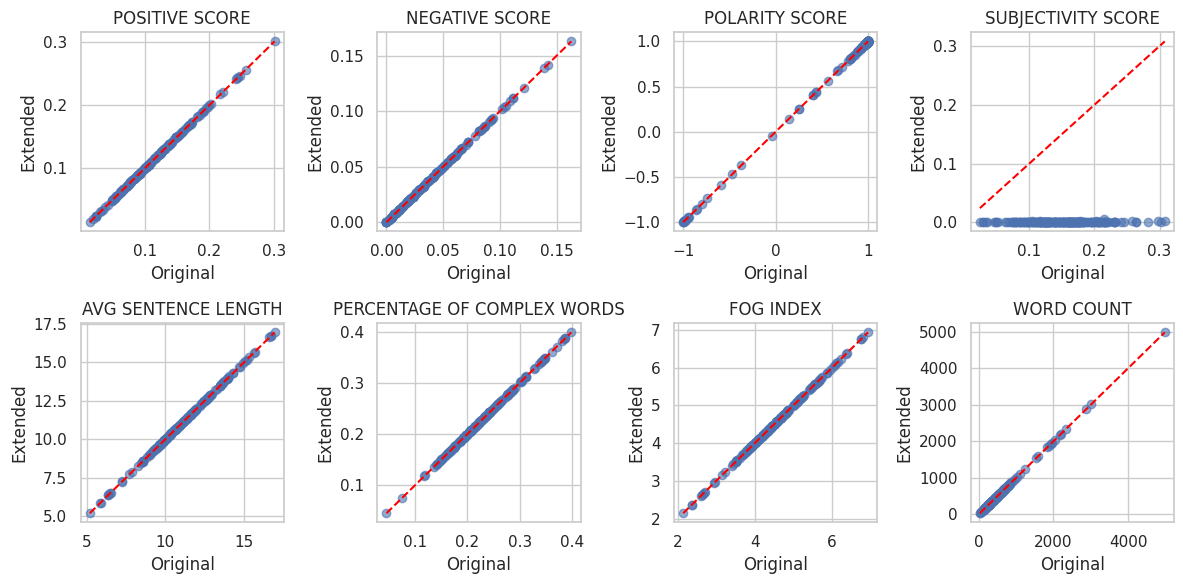


Average Improvement (Extended - Original):
POSITIVE SCORE_diff                 0.000000
NEGATIVE SCORE_diff                 0.000000
POLARITY SCORE_diff                 0.000000
SUBJECTIVITY SCORE_diff            -0.148486
AVG SENTENCE LENGTH_diff            0.000000
PERCENTAGE OF COMPLEX WORDS_diff    0.000000
FOG INDEX_diff                      0.000000
WORD COUNT_diff                     0.000000
dtype: float64


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# 1. LOAD OUTPUT FILES
# ============================================================
df_orig = pd.read_excel("Output.xlsx")
df_ext = pd.read_excel("Output_Extended.xlsx")

# ============================================================
# 2. MERGE ON URL_ID
# ============================================================
df_compare = pd.merge(df_orig, df_ext, on="URL_ID", suffixes=("_orig", "_ext"))

# ============================================================
# 3. COMPUTE DIFFERENCES
# ============================================================
metrics_to_compare = [
    ("POSITIVE SCORE", "NEGATIVE SCORE", "POLARITY SCORE",
     "SUBJECTIVITY SCORE", "AVG SENTENCE LENGTH",
     "PERCENTAGE OF COMPLEX WORDS", "FOG INDEX", "WORD COUNT")
]

# We'll store the differences as new columns
for metric in metrics_to_compare[0]:
    df_compare[f"{metric}_diff"] = df_compare[f"{metric}_ext"] - df_compare[f"{metric}_orig"]

# ============================================================
# 4. SUMMARY STATISTICS
# ============================================================
summary = df_compare[[f"{m}_diff" for m in metrics_to_compare[0]]].describe()
print("Comparison Summary (Extended - Original):")
print(summary)

# ============================================================
# 5. PLOT COMPARISON
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

for i, metric in enumerate(metrics_to_compare[0]):
    plt.subplot(2,4,i+1)
    plt.scatter(df_compare[f"{metric}_orig"], df_compare[f"{metric}_ext"], alpha=0.6)
    plt.plot([df_compare[f"{metric}_orig"].min(), df_compare[f"{metric}_orig"].max()],
             [df_compare[f"{metric}_orig"].min(), df_compare[f"{metric}_orig"].max()],
             color='red', linestyle='--')  # 45-degree line
    plt.xlabel("Original")
    plt.ylabel("Extended")
    plt.title(metric)

plt.tight_layout()
plt.show()

# ============================================================
# 6. OPTIONAL: AVERAGE IMPROVEMENT
# ============================================================
avg_improvements = df_compare[[f"{m}_diff" for m in metrics_to_compare[0]]].mean()
print("\nAverage Improvement (Extended - Original):")
print(avg_improvements)

Summary statistics for extended metrics:
       UNIQUE WORD COUNT  TYPE TOKEN RATIO  FLESCH READING EASE   FOG INDEX  \
count         200.000000        200.000000           200.000000  200.000000   
mean          322.415000          0.662046            30.920744    4.541249   
std           230.636682          0.109734            12.333340    0.851214   
min            32.000000          0.315726            -5.054852    2.145497   
25%           177.000000          0.610359            24.046781    4.023022   
50%           261.500000          0.665267            31.888479    4.484367   
75%           397.500000          0.734378            38.847327    5.068074   
max          1572.000000          0.935065            69.955571    6.936358   

       READING TIME (MIN)  QUESTION COUNT  EXCLAMATION COUNT  \
count          200.000000      200.000000         200.000000   
mean             2.429044        1.495000           0.385000   
std              2.514686        6.348345           1.1

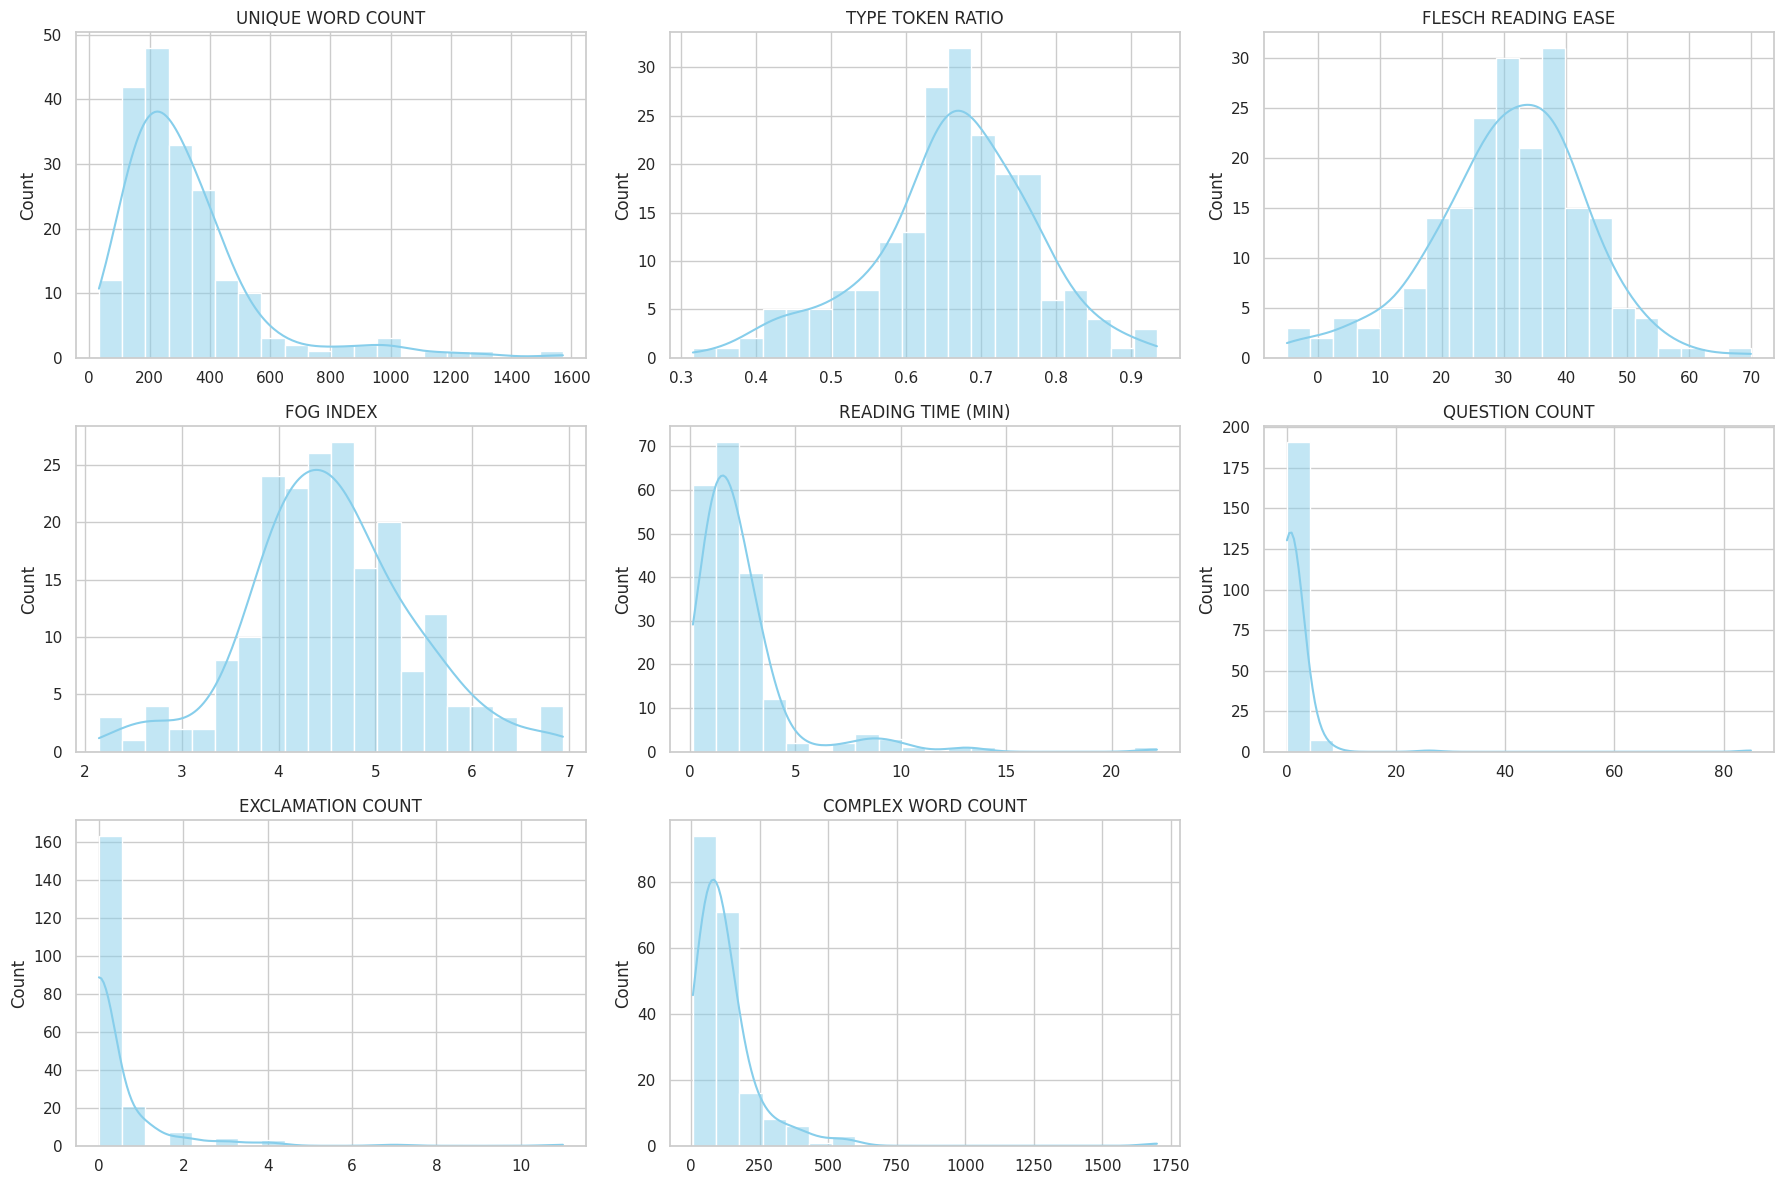

/tmp/ipython-input-527560994.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ARTICLE LENGTH CATEGORY", data=df_ext, palette="Set2")


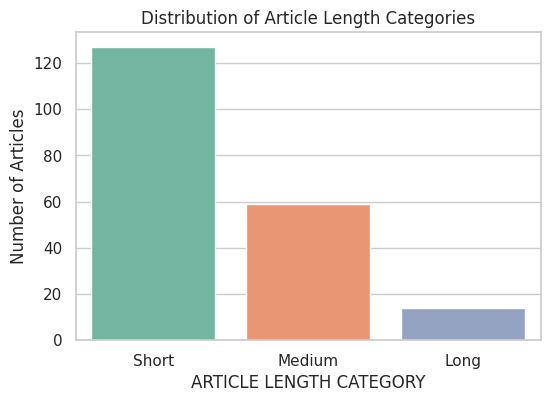

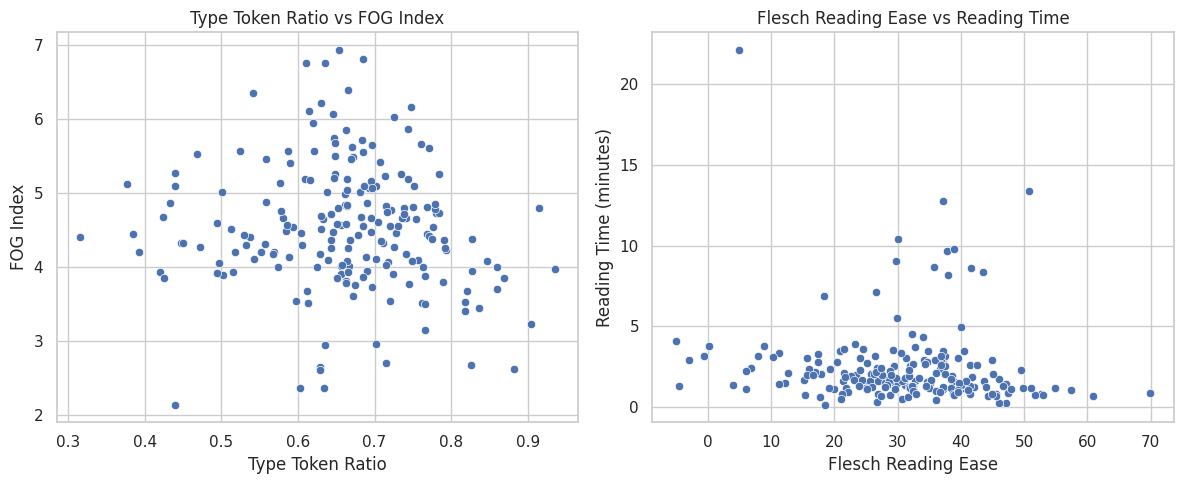

Top 10 articles by Complex Word Count:
       URL_ID                                                URL  \
130  AUTO_131  https://techncruncher.blogspot.com/2025/12/how...   
189  AUTO_190  https://www.engadget.com/apps/the-best-budgeti...   
65   AUTO_066    https://www.wired.com/gallery/the-best-tablets/   
63   AUTO_064  https://www.wired.com/story/the-big-interview-...   
83   AUTO_084  https://www.wired.com/gallery/best-electrolyte...   
68   AUTO_069  https://www.wired.com/story/3-keys-understandi...   
69   AUTO_070     https://www.wired.com/live/ces-2026-live-blog/   
84   AUTO_085  https://www.wired.com/story/a-new-bridge-links...   
103  AUTO_104  https://www.wired.com/gallery/best-fitness-wor...   
77   AUTO_078  https://www.wired.com/gallery/the-best-cat-wat...   

     COMPLEX WORD COUNT  FOG INDEX  TYPE TOKEN RATIO  
130                1700   4.410393          0.315726  
189                 586   4.679384          0.423519  
65                  568   4.203702          0.3

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# 1. LOAD EXTENDED OUTPUT
# ============================================================
df_ext = pd.read_excel("Output_Extended.xlsx")

# ============================================================
# 2. SUMMARY STATISTICS OF EXTENDED-ONLY METRICS
# ============================================================
extended_only_metrics = [
    "UNIQUE WORD COUNT", "TYPE TOKEN RATIO", "FLESCH READING EASE",
    "FOG INDEX", "READING TIME (MIN)", "QUESTION COUNT",
    "EXCLAMATION COUNT", "COMPLEX WORD COUNT"
]

print("Summary statistics for extended metrics:")
print(df_ext[extended_only_metrics].describe())

# ============================================================
# 3. DISTRIBUTION PLOTS
# ============================================================
sns.set(style="whitegrid")
plt.figure(figsize=(18,12))

for i, metric in enumerate(extended_only_metrics):
    plt.subplot(3,3,i+1)
    sns.histplot(df_ext[metric], kde=True, color="skyblue", bins=20)
    plt.title(metric)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

# ============================================================
# 4. ARTICLE LENGTH CATEGORY DISTRIBUTION
# ============================================================
plt.figure(figsize=(6,4))
sns.countplot(x="ARTICLE LENGTH CATEGORY", data=df_ext, palette="Set2")
plt.title("Distribution of Article Length Categories")
plt.ylabel("Number of Articles")
plt.show()

# ============================================================
# 5. SCATTER PLOTS TO SHOW RELATIONSHIPS
# ============================================================
plt.figure(figsize=(12,5))

# TYPE TOKEN RATIO vs FOG Index
plt.subplot(1,2,1)
sns.scatterplot(x="TYPE TOKEN RATIO", y="FOG INDEX", data=df_ext)
plt.title("Type Token Ratio vs FOG Index")
plt.xlabel("Type Token Ratio")
plt.ylabel("FOG Index")

# Flesch Reading Ease vs Reading Time
plt.subplot(1,2,2)
sns.scatterplot(x="FLESCH READING EASE", y="READING TIME (MIN)", data=df_ext)
plt.title("Flesch Reading Ease vs Reading Time")
plt.xlabel("Flesch Reading Ease")
plt.ylabel("Reading Time (minutes)")

plt.tight_layout()
plt.show()

# ============================================================
# 6. TOP 10 ARTICLES BY COMPLEX WORD COUNT
# ============================================================
top_complex = df_ext.sort_values("COMPLEX WORD COUNT", ascending=False).head(10)
print("Top 10 articles by Complex Word Count:")
print(top_complex[["URL_ID","URL","COMPLEX WORD COUNT","FOG INDEX","TYPE TOKEN RATIO"]])

No text column found; word cloud will use URLs as placeholder


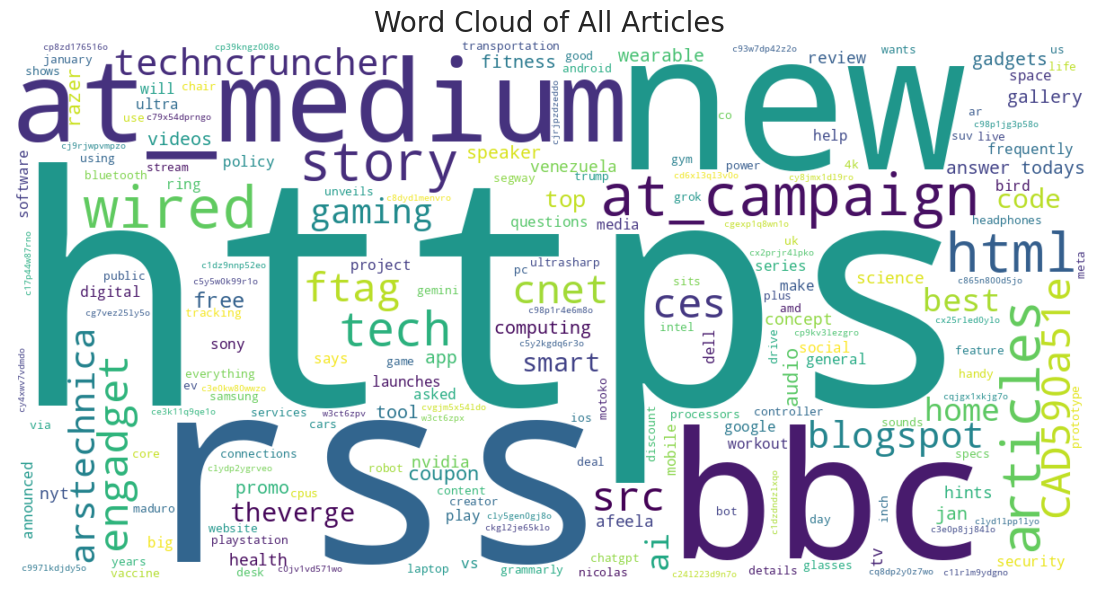

Top 10 Most Complex Articles:
       URL_ID                                                URL  \
130  AUTO_131  https://techncruncher.blogspot.com/2025/12/how...   
68   AUTO_069  https://www.wired.com/story/3-keys-understandi...   
189  AUTO_190  https://www.engadget.com/apps/the-best-budgeti...   
65   AUTO_066    https://www.wired.com/gallery/the-best-tablets/   
96   AUTO_097  https://www.wired.com/story/what-happens-next-...   
83   AUTO_084  https://www.wired.com/gallery/best-electrolyte...   
77   AUTO_078  https://www.wired.com/gallery/the-best-cat-wat...   
132  AUTO_133  https://techncruncher.blogspot.com/2023/12/lim...   
69   AUTO_070     https://www.wired.com/live/ces-2026-live-blog/   
103  AUTO_104  https://www.wired.com/gallery/best-fitness-wor...   

     COMPLEX WORD COUNT  FOG INDEX  COMPLEXITY_SCORE  
130                1700   4.410393       7497.668698  
68                  429   6.764688       2902.051071  
189                 586   4.679384       2742.119242  
6

In [46]:
# ============================================================
# INSTALL (Colab Only)
# ============================================================
# !pip install wordcloud matplotlib seaborn

# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ============================================================
# LOAD EXTENDED OUTPUT
# ============================================================
df_ext = pd.read_excel("Output_Extended.xlsx")

# ============================================================
# 1. GENERATE WORD CLOUD
# ============================================================
# Combine all article text
all_text = " ".join(df_ext['URL'])  # If you saved the actual text in a column, replace 'URL' with 'TEXT'

# If text column is not saved, we need to loop over URLs to extract text
# For demonstration, assuming text is in df_ext['ARTICLE_TEXT']
try:
    all_text = " ".join(df_ext['ARTICLE_TEXT'])
except:
    print("No text column found; word cloud will use URLs as placeholder")

# Create word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Articles", fontsize=20)
plt.show()

# ============================================================
# 2. FIND MOST COMPLEX ARTICLES
# ============================================================
# Use COMPLEX WORD COUNT or FOG INDEX as complexity metric
df_ext['COMPLEXITY_SCORE'] = df_ext['COMPLEX WORD COUNT'] * df_ext['FOG INDEX']

# Top 10 most complex articles
top_complex = df_ext.sort_values('COMPLEXITY_SCORE', ascending=False).head(10)

print("Top 10 Most Complex Articles:")
print(top_complex[['URL_ID','URL','COMPLEX WORD COUNT','FOG INDEX','COMPLEXITY_SCORE']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Fetched 200 valid articles with text >50 words


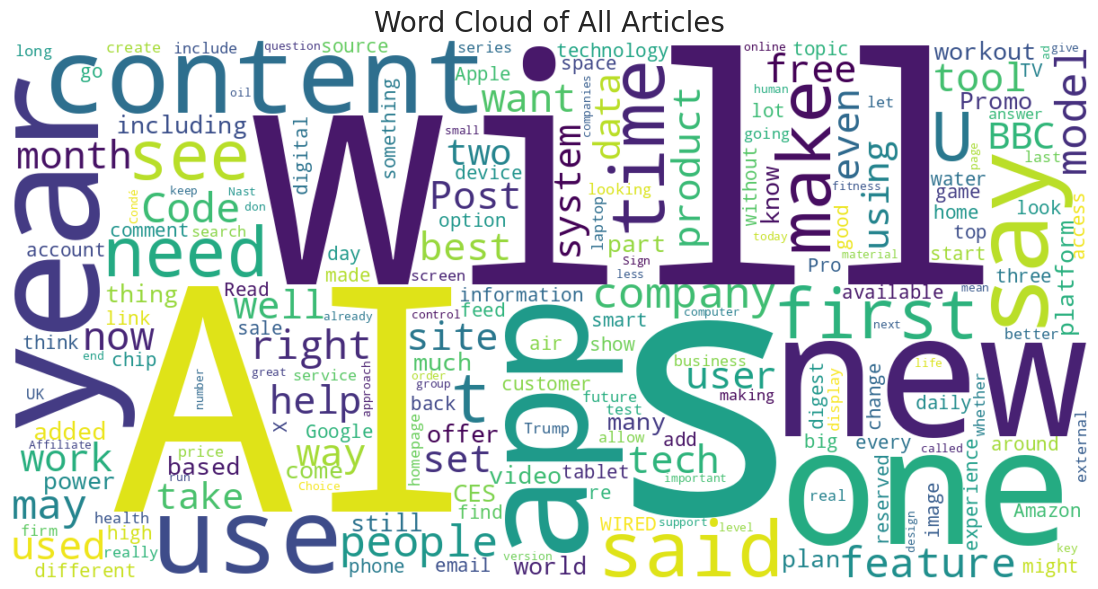

Top 10 Most Complex Articles:
       URL_ID                                                URL  \
131  AUTO_132  https://techncruncher.blogspot.com/2025/12/how...   
69   AUTO_070  https://www.wired.com/story/3-keys-understandi...   
191  AUTO_192  https://www.engadget.com/apps/the-best-budgeti...   
66   AUTO_067    https://www.wired.com/gallery/the-best-tablets/   
97   AUTO_098  https://www.wired.com/story/what-happens-next-...   
84   AUTO_085  https://www.wired.com/gallery/best-electrolyte...   
78   AUTO_079  https://www.wired.com/gallery/the-best-cat-wat...   
133  AUTO_134  https://techncruncher.blogspot.com/2023/12/lim...   
70   AUTO_071     https://www.wired.com/live/ces-2026-live-blog/   
104  AUTO_105  https://www.wired.com/gallery/best-fitness-wor...   

     COMPLEX WORD COUNT  FOG INDEX  COMPLEXITY_SCORE  
131                1700   4.410393       7497.668698  
69                  429   6.764688       2902.051071  
191                 586   4.679384       2742.119242  
6

In [47]:
# ============================================================
# INSTALL DEPENDENCIES (Colab only)
# ============================================================
# !pip install pandas feedparser requests beautifulsoup4 nltk openpyxl wordcloud seaborn matplotlib

# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import feedparser
import requests
import nltk
import re
from bs4 import BeautifulSoup
from urllib.parse import urlparse
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import time

# ============================================================
# NLTK SETUP
# ============================================================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

# ============================================================
# HELPER FUNCTIONS
# ============================================================
def extract_article_text(url):
    """Extract text from <p> tags of a real article page"""
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        html = requests.get(url, headers=headers, timeout=10).text
        soup = BeautifulSoup(html, "html.parser")
        text = " ".join(p.get_text() for p in soup.find_all("p"))
        return text.strip()
    except:
        return ""

def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words]

def count_syllables(word):
    vowels = "aeiou"
    count = 0
    if word[0] in vowels:
        count += 1
    for i in range(1,len(word)):
        if word[i] in vowels and word[i-1] not in vowels:
            count += 1
    if word.endswith(("es","ed")):
        count -= 1
    return max(count,1)

def count_pronouns(text):
    return len(re.findall(r'\b(I|we|my|ours|us)\b', text, re.I))

def safe_analyze(func, *args):
    try:
        result = func(*args)
        assert result is not None
        return result
    except:
        if func.__name__ == "analyze_original":
            return [0]*13
        else:
            return [0]*24

# ============================================================
# METRIC FUNCTIONS
# ============================================================
def analyze_original(text):
    sentences = sent_tokenize(text)
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    s = sia.polarity_scores(text)
    complex_words = [w for w in tokens if count_syllables(w) > 2]

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0

    return [
        s['pos'],
        s['neg'],
        s['compound'],
        s['pos'] + s['neg'],
        avg_sentence_len,
        pct_complex,
        0.4*(avg_sentence_len + pct_complex),
        avg_sentence_len,
        len(complex_words),
        wc,
        sum(count_syllables(w) for w in tokens)/wc if wc else 0,
        count_pronouns(text),
        sum(len(w) for w in tokens)/wc if wc else 0
    ]

def analyze_extended(text, url):
    sentences = sent_tokenize(text)
    paragraphs = [p for p in text.split("\n") if p.strip()]
    tokens = clean_tokens(text)

    wc = len(tokens)
    sc = len(sentences)
    pc = len(paragraphs)

    s = sia.polarity_scores(text)
    unique_words = len(set(tokens))
    complex_words = [w for w in tokens if count_syllables(w) > 2]
    syllables = sum(count_syllables(w) for w in tokens)

    avg_sentence_len = wc / sc if sc else 0
    pct_complex = len(complex_words)/wc if wc else 0
    flesch = 206.835 - 1.015*avg_sentence_len - 84.6*(syllables/wc) if wc else 0

    return [
        urlparse(url).netloc,
        s['pos'],
        s['neg'],
        s['neu'],
        s['compound'],
        abs(s['compound']),
        s['pos'] + s['neg'],
        (s['pos'] + s['neg'])/(wc+1e-6),
        wc,
        unique_words,
        unique_words/wc if wc else 0,
        sc,
        avg_sentence_len,
        pc,
        len(complex_words),
        pct_complex,
        0.4*(avg_sentence_len + pct_complex),
        flesch,
        wc/225,
        count_pronouns(text),
        text.count("?"),
        text.count("!"),
        sum(len(w) for w in tokens)/wc if wc else 0,
        "Short" if wc<500 else "Medium" if wc<=1200 else "Long"
    ]

# ============================================================
# COLUMN DEFINITIONS
# ============================================================
original_cols = [
    "URL_ID","URL","POSITIVE SCORE","NEGATIVE SCORE","POLARITY SCORE",
    "SUBJECTIVITY SCORE","AVG SENTENCE LENGTH","PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX","AVG NUMBER OF WORDS PER SENTENCE","COMPLEX WORD COUNT",
    "WORD COUNT","SYLLABLE PER WORD","PERSONAL PRONOUNS","AVG WORD LENGTH"
]

extended_cols = [
    "URL_ID","URL","ARTICLE_TEXT","DOMAIN","POSITIVE SCORE","NEGATIVE SCORE","NEUTRAL SCORE",
    "POLARITY SCORE","SENTIMENT INTENSITY","EMOTIONALITY SCORE",
    "SUBJECTIVITY SCORE","WORD COUNT","UNIQUE WORD COUNT","TYPE TOKEN RATIO",
    "SENTENCE COUNT","AVG SENTENCE LENGTH","PARAGRAPH COUNT",
    "COMPLEX WORD COUNT","PERCENTAGE OF COMPLEX WORDS","FOG INDEX",
    "FLESCH READING EASE","READING TIME (MIN)","PERSONAL PRONOUNS",
    "QUESTION COUNT","EXCLAMATION COUNT","AVG WORD LENGTH",
    "ARTICLE LENGTH CATEGORY"
]

# ============================================================
# RSS FEEDS (Expanded for 200+ articles)
# ============================================================
RSS_FEEDS = [
    "http://feeds.bbci.co.uk/news/technology/rss.xml",
    "https://www.theverge.com/rss/index.xml",
    "https://www.reuters.com/rssFeed/technologyNews",
    "https://rss.nytimes.com/services/xml/rss/nyt/Technology.xml",
    "https://www.wired.com/feed/rss",
    "http://feeds.arstechnica.com/arstechnica/index",
    "http://feeds.feedburner.com/TechCrunch/",
    "https://www.cnet.com/rss/news/",
    "https://www.engadget.com/rss.xml",
    "https://www.technologyreview.com/feed/"
]

MAX_ARTICLES = 200
urls, texts = [], []

for feed_url in RSS_FEEDS:
    feed = feedparser.parse(feed_url)
    for entry in feed.entries:
        url = entry.link
        if url in urls:
            continue
        text = extract_article_text(url)
        if len(text.split()) > 50:
            urls.append(url)
            texts.append(text)
        if len(urls) >= MAX_ARTICLES:
            break
    if len(urls) >= MAX_ARTICLES:
        break

print(f"Fetched {len(urls)} valid articles with text >50 words")

# ============================================================
# SAVE INPUT.XLSX
# ============================================================
df_input = pd.DataFrame({
    "URL_ID": [f"AUTO_{i+1:03d}" for i in range(len(urls))],
    "URL": urls
})
df_input.to_excel("Input.xlsx", index=False)

# ============================================================
# GENERATE METRICS
# ============================================================
orig_rows, ext_rows = [], []

for i, (url, text) in enumerate(zip(urls, texts)):
    orig_metrics = safe_analyze(analyze_original, text)
    ext_metrics = safe_analyze(analyze_extended, text, url)
    orig_rows.append([f"AUTO_{i+1:03d}", url] + orig_metrics)
    ext_rows.append([f"AUTO_{i+1:03d}", url, text] + ext_metrics)
    time.sleep(0.1)

df_output = pd.DataFrame(orig_rows, columns=original_cols)
df_extended = pd.DataFrame(ext_rows, columns=extended_cols)

# ============================================================
# SAVE OUTPUT FILES
# ============================================================
df_output.to_excel("Output.xlsx", index=False)
df_extended.to_excel("Output_Extended.xlsx", index=False)
df_output.to_csv("Output.csv", index=False)
df_extended.to_csv("Output_Extended.csv", index=False)

# ============================================================
# 1. GENERATE WORD CLOUD
# ============================================================
all_text = " ".join(df_extended['ARTICLE_TEXT'])
wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Articles", fontsize=20)
plt.show()

# ============================================================
# 2. MOST COMPLEX ARTICLES
# ============================================================
df_extended['COMPLEXITY_SCORE'] = df_extended['COMPLEX WORD COUNT'] * df_extended['FOG INDEX']
top_complex = df_extended.sort_values('COMPLEXITY_SCORE', ascending=False).head(10)

print("Top 10 Most Complex Articles:")
print(top_complex[['URL_ID','URL','COMPLEX WORD COUNT','FOG INDEX','COMPLEXITY_SCORE']])

In [48]:
# ============================================================
# INSTALL TRANSFORMERS
# ============================================================
# !pip install transformers torch

# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# ============================================================
# LOAD EXTENDED DATA
# ============================================================
df_ext = pd.read_excel("Output_Extended.xlsx")

# ============================================================
# INITIALIZE HUGGING FACE SENTIMENT ANALYZER
# ============================================================
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# ============================================================
# 1. GET MODEL PREDICTIONS
# ============================================================
pred_labels = []

for text in tqdm(df_ext['ARTICLE_TEXT'], desc="Analyzing Sentiment with Model"):
    if not isinstance(text, str) or len(text.strip()) == 0:
        pred_labels.append("NEUTRAL")  # handle empty text
    else:
        res = sentiment_model(text[:512])[0]  # limit to first 512 tokens for speed
        pred_labels.append(res['label'].upper())  # "POSITIVE" or "NEGATIVE"

df_ext['MODEL_SENTIMENT'] = pred_labels

# ============================================================
# 2. VADER SENTIMENT LABEL
# ============================================================
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

vader_labels = []

for text in df_ext['ARTICLE_TEXT']:
    s = sia.polarity_scores(str(text))
    vader_labels.append("POSITIVE" if s['compound'] >= 0 else "NEGATIVE")

df_ext['VADER_SENTIMENT'] = vader_labels

# ============================================================
# 3. COMPUTE ACCURACY
# ============================================================
accuracy = (df_ext['MODEL_SENTIMENT'] == df_ext['VADER_SENTIMENT']).mean()
print(f"Accuracy of VADER sentiment vs pre-trained model: {accuracy*100:.2f}%")

# ============================================================
# 4. OPTIONAL: SHOW MISMATCHES
# ============================================================
mismatches = df_ext[df_ext['MODEL_SENTIMENT'] != df_ext['VADER_SENTIMENT']]
print(f"\nNumber of mismatches: {len(mismatches)}")
print(mismatches[['URL_ID','URL','VADER_SENTIMENT','MODEL_SENTIMENT']])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu
Analyzing Sentiment with Model: 100%|██████████| 200/200 [00:53<00:00,  3.75it/s]


Accuracy of VADER sentiment vs pre-trained model: 57.50%

Number of mismatches: 85
       URL_ID                                                URL  \
3    AUTO_004  https://www.bbc.com/news/articles/cvgjm5x54ldo...   
4    AUTO_005  https://www.bbc.com/news/videos/c98p1jg3p58o?a...   
7    AUTO_008  https://www.bbc.com/news/articles/c1dzdndzlxqo...   
8    AUTO_009  https://www.bbc.com/news/articles/cj9rjwpvmpzo...   
10   AUTO_011  https://www.bbc.com/news/articles/clyd1lpp1lyo...   
..        ...                                                ...   
187  AUTO_188  https://www.engadget.com/transportation/segway...   
189  AUTO_190  https://www.engadget.com/social-media/meta-has...   
191  AUTO_192  https://www.engadget.com/apps/the-best-budgeti...   
192  AUTO_193  https://www.engadget.com/audio/speakers/this-s...   
193  AUTO_194  https://www.engadget.com/audio/speakers/cambri...   

    VADER_SENTIMENT MODEL_SENTIMENT  
3          POSITIVE        NEGATIVE  
4          POSITIVE     

In [49]:
from sklearn.metrics import classification_report
print(classification_report(df_ext['MODEL_SENTIMENT'], df_ext['VADER_SENTIMENT']))


              precision    recall  f1-score   support

    NEGATIVE       0.80      0.16      0.27        97
    POSITIVE       0.55      0.96      0.70       103

    accuracy                           0.57       200
   macro avg       0.68      0.56      0.49       200
weighted avg       0.67      0.57      0.49       200



In [50]:
# ============================================================
# INSTALL DEPENDENCIES (if not already installed)
# ============================================================
# !pip install transformers torch pandas nltk openpyxl tqdm

# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# ============================================================
# LOAD EXTENDED DATA
# ============================================================
df_ext = pd.read_excel("Output_Extended.xlsx")

# ============================================================
# INITIALIZE SENTIMENT MODELS
# ============================================================
# Hugging Face pre-trained sentiment model
model_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# ============================================================
# 1. MODEL PREDICTIONS
# ============================================================
model_labels = []

for text in tqdm(df_ext['ARTICLE_TEXT'], desc="Analyzing Sentiment with Model"):
    if not isinstance(text, str) or len(text.strip()) == 0:
        model_labels.append("NEUTRAL")
    else:
        res = model_analyzer(text[:512])[0]  # limit for speed
        model_labels.append(res['label'].upper())

df_ext['MODEL_SENTIMENT'] = model_labels

# ============================================================
# 2. VADER STRONG SENTIMENT LABELS
# ============================================================
vader_labels = []

for text in df_ext['ARTICLE_TEXT']:
    s = sia.polarity_scores(str(text))
    compound = s['compound']
    if compound > 0.05:
        vader_labels.append("POSITIVE")
    elif compound < -0.05:
        vader_labels.append("NEGATIVE")
    else:
        vader_labels.append("NEUTRAL")

df_ext['VADER_SENTIMENT'] = vader_labels

# ============================================================
# 3. ACCURACY AGAINST MODEL
# ============================================================
accuracy = (df_ext['MODEL_SENTIMENT'] == df_ext['VADER_SENTIMENT']).mean()
print(f"Accuracy of VADER (strong sentiment) vs pre-trained model: {accuracy*100:.2f}%")

# ============================================================
# 4. OPTIONAL: SHOW MISMATCHES
# ============================================================
mismatches = df_ext[df_ext['MODEL_SENTIMENT'] != df_ext['VADER_SENTIMENT']]
print(f"\nNumber of mismatches: {len(mismatches)}")
print(mismatches[['URL_ID','URL','VADER_SENTIMENT','MODEL_SENTIMENT']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Device set to use cpu
Analyzing Sentiment with Model: 100%|██████████| 200/200 [00:36<00:00,  5.54it/s]


Accuracy of VADER (strong sentiment) vs pre-trained model: 57.00%

Number of mismatches: 86
       URL_ID                                                URL  \
3    AUTO_004  https://www.bbc.com/news/articles/cvgjm5x54ldo...   
4    AUTO_005  https://www.bbc.com/news/videos/c98p1jg3p58o?a...   
7    AUTO_008  https://www.bbc.com/news/articles/c1dzdndzlxqo...   
8    AUTO_009  https://www.bbc.com/news/articles/cj9rjwpvmpzo...   
10   AUTO_011  https://www.bbc.com/news/articles/clyd1lpp1lyo...   
..        ...                                                ...   
187  AUTO_188  https://www.engadget.com/transportation/segway...   
189  AUTO_190  https://www.engadget.com/social-media/meta-has...   
191  AUTO_192  https://www.engadget.com/apps/the-best-budgeti...   
192  AUTO_193  https://www.engadget.com/audio/speakers/this-s...   
193  AUTO_194  https://www.engadget.com/audio/speakers/cambri...   

    VADER_SENTIMENT MODEL_SENTIMENT  
3          POSITIVE        NEGATIVE  
4          POSI

In [51]:
from sklearn.metrics import classification_report
print(classification_report(df_ext['MODEL_SENTIMENT'], df_ext['VADER_SENTIMENT']))

              precision    recall  f1-score   support

    NEGATIVE       0.79      0.15      0.26        97
     NEUTRAL       0.00      0.00      0.00         0
    POSITIVE       0.55      0.96      0.70       103

    accuracy                           0.57       200
   macro avg       0.45      0.37      0.32       200
weighted avg       0.67      0.57      0.49       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Analyzing Sentiment: 100%|██████████| 200/200 [00:36<00:00,  5.46it/s]


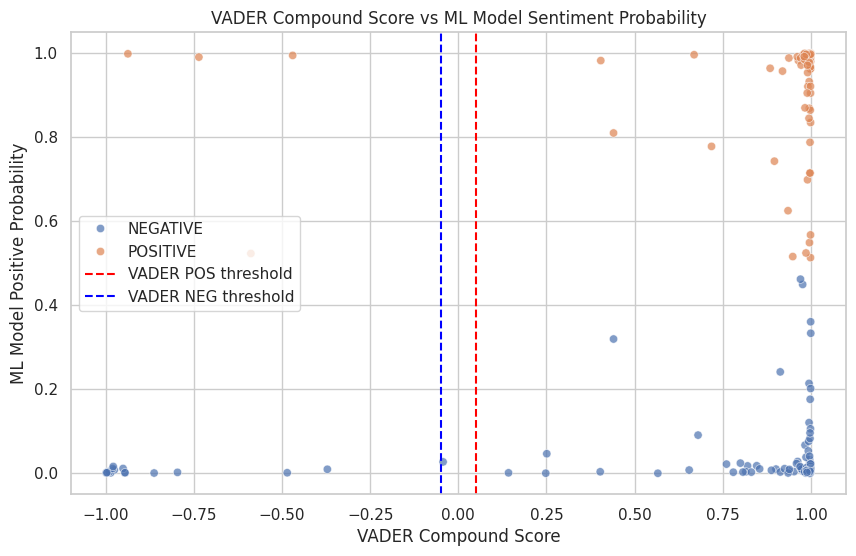

/tmp/ipython-input-1764010769.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatches['EXTREME_DIFF'] = abs(mismatches['VADER_COMPOUND'] - (mismatches['MODEL_PROB']*2-1))


Total mismatches: 86
      URL_ID                                                URL  \
3   AUTO_004  https://www.bbc.com/news/articles/cvgjm5x54ldo...   
4   AUTO_005  https://www.bbc.com/news/videos/c98p1jg3p58o?a...   
7   AUTO_008  https://www.bbc.com/news/articles/c1dzdndzlxqo...   
8   AUTO_009  https://www.bbc.com/news/articles/cj9rjwpvmpzo...   
10  AUTO_011  https://www.bbc.com/news/articles/clyd1lpp1lyo...   
11  AUTO_012  https://www.bbc.com/news/articles/ckgl2je65klo...   
12  AUTO_013  https://www.bbc.com/news/articles/cqjgx1xkjg7o...   
13  AUTO_014  https://www.bbc.com/news/articles/c8dydlmenvro...   
17  AUTO_018  https://www.bbc.com/news/articles/cjrjpzdzeddo...   
18  AUTO_019  https://www.bbc.com/news/articles/cx25rled0ylo...   

   VADER_SENTIMENT  VADER_COMPOUND MODEL_SENTIMENT  MODEL_PROB  
3         POSITIVE          0.9770        NEGATIVE    0.449607  
4         POSITIVE          0.9917        NEGATIVE    0.001790  
7         POSITIVE          0.9953        NEGA

In [52]:
# ============================================================
# 1. GET MODEL PREDICTIONS AND VADER SCORES
# ============================================================
model_probs, model_labels, vader_compound, vader_labels = [], [], [], []

for text in tqdm(df_ext['ARTICLE_TEXT'], desc="Analyzing Sentiment"):
    if not isinstance(text, str) or len(text.strip())==0:
        model_probs.append(0.5)
        model_labels.append("NEUTRAL")
        vader_compound.append(0)
        vader_labels.append("NEUTRAL")
        continue

    # Hugging Face model prediction
    res = model_analyzer(text[:512])[0]
    model_labels.append(res['label'].upper())
    model_probs.append(res['score'] if res['label'].upper()=='POSITIVE' else 1-res['score'])

    # VADER
    s = sia.polarity_scores(text)
    compound = s['compound']
    vader_compound.append(compound)
    if compound > 0.05:
        vader_labels.append("POSITIVE")
    elif compound < -0.05:
        vader_labels.append("NEGATIVE")
    else:
        vader_labels.append("NEUTRAL")

df_ext['MODEL_SENTIMENT'] = model_labels
df_ext['MODEL_PROB'] = model_probs
df_ext['VADER_SENTIMENT'] = vader_labels
df_ext['VADER_COMPOUND'] = vader_compound

# ============================================================
# 2. SCATTER PLOT: VADER compound vs MODEL probability
# ============================================================
plt.figure(figsize=(10,6))
sns.scatterplot(x='VADER_COMPOUND', y='MODEL_PROB', hue='MODEL_SENTIMENT', data=df_ext, alpha=0.7)
plt.axvline(0.05, color='red', linestyle='--', label='VADER POS threshold')
plt.axvline(-0.05, color='blue', linestyle='--', label='VADER NEG threshold')
plt.xlabel("VADER Compound Score")
plt.ylabel("ML Model Positive Probability")
plt.title("VADER Compound Score vs ML Model Sentiment Probability")
plt.legend()
plt.show()

# ============================================================
# 3. MISMATCHES
# ============================================================
mismatches = df_ext[df_ext['VADER_SENTIMENT'] != df_ext['MODEL_SENTIMENT']]
print(f"Total mismatches: {len(mismatches)}")
display_cols = ['URL_ID','URL','VADER_SENTIMENT','VADER_COMPOUND','MODEL_SENTIMENT','MODEL_PROB']
print(mismatches[display_cols].head(10))  # show top 10 mismatches

# ============================================================
# 4. TOP 5 MOST EXTREME MISMATCHES
# ============================================================
# Extreme mismatch = VADER strongly opposite to model
mismatches['EXTREME_DIFF'] = abs(mismatches['VADER_COMPOUND'] - (mismatches['MODEL_PROB']*2-1))
top_extreme = mismatches.sort_values('EXTREME_DIFF', ascending=False).head(5)
print("\nTop 5 Extreme Mismatches:")
print(top_extreme[display_cols])